In [32]:
# Sphere-Plane NN model
## https://www.adeveloperdiary.com/data-science/machine-learning/understand-and-implement-the-backpropagation-algorithm-from-scratch-in-python/

import matplotlib.pyplot as plt 
from math import exp
from math import sqrt

from random import seed
from random import random
from random import randint
import matplotlib.lines as lines 

import math
 
# Initialize a network


class neuron_s():
    
    def __init__(self, n_inputs,c,o):
        self.mode = "C"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]

        self.delta = 0
        self.output = 0
        self.R = .05 + 0.15*random()
        self.C = c
        self.al = 0.1
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        
    def copy (self):
        new_neuron = neuron_s(len(self.inputs), self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.R = self.R
        return new_neuron
    
    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
 
        activation = 1 - (y3 -  2*y2 + y1 )/(self.R**2)
        return activation
        
    def transfer_l(self,activation):
        self.output = activation
        return self.output
    
    def transfer_derivative_l(self):
        return 1
    
    def transfer(self,activation):
        
        if  -self.al*activation > 100:
            self.output = 0
        else:
            self.output = 1.0 / (1.0 + exp(-self.al*activation)) 
        return self.output
    
    def transfer_derivative(self):
        return self.al*self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return 2*(self.weights[idx]-self.inputs[idx])/(self.R**2)

    def activation_derivate_by_weight(self, idx):
        return 2*(-self.weights[idx]+self.inputs[idx])/(self.R**2)

    def activation_derivate_by_R(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        y3 = sum([self.weights[i]* self.weights[i] for i in range(N) ])
        return 2*(y3 - 2*y2 +y1)  / (self.R**3) 
    
    def print_neuron_param(self):
        print(self.weights, self.R,self.C)
        
    def calculate_update(self, Ct, m_st):
        if self.output < .5 and self.C != Ct:
            return
        
        if self.output < .5 and m_st:
            return
        
        for j in range(len(self.weights)):
            self.dw[j] += ( self.delta * self.activation_derivate_by_weight(j))
        self.dR += self.delta*self.activation_derivate_by_R()
        #print(self.C,self.delta, self.activation_derivate_by_R(), self.delta*self.activation_derivate_by_R())
        

    def update_weights(self, l_rate):
        #print ("update weights")
        
        dH = sqrt(sum([x**2 for x in self.dw]) + self.dR**2 )*.5
        if dH < 0.000001:
            dH = 1

        #print ("update :", self.inputs)
        for j in range(len(self.weights)):
            #print ("   ", self.weights[j],self.dw[j]/dH ," == > " ,self.weights[j] + l_rate * self.dw[j]/dH)
            self.weights[j] -= l_rate * self.dw[j]/dH
            
        #print ("   ", self.R,self.dR/dH," == > " ,self.R + l_rate * self.dR/dH)
        self.R -= l_rate * self.dR/dH
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dR = 0
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        cc = plt.Circle( (self.weights[0], self.weights[1] ), self.R ,fill = False,color=cl )   
        axes.add_artist( cc)    
        
        
class neuron_l():
    
    def __init__(self, n_inputs,c, o):
        self.mode = "L"
        self.C = c
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]
        self.delta = 0
        self.output = 0
        self.A = random()
        
        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
    def copy (self):
        new_neuron = neuron_l(len(self.inputs),  self.C, self.outlayer)
        new_neuron.inputs = self.inputs.copy()
        new_neuron.weights = self.weights.copy()
        new_neuron.delta = self.delta
        new_neuron.output = self.output
        new_neuron.A = self.A
        return new_neuron

    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = (y1  - self.A) 
        print (self.C,"activate    ", self.weights, self.A, ":", self.inputs,"==>", activation)
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-activation)) 
        print (self.C,"transfer    ", activation,"==>", self.output)
        return self.output

    def transfer_derivative(self):
        return self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  self.inputs[idx]

    def activation_derivate_by_A(self):
        return -1
    
    def print_neuron_param(self):
        print(self.weights, self.A, self.C,":",self.inputs, self.output)

    def calculate_update(self, Ct, m_st):
        for j in range(len(self.weights)):
            self.dw[j] = self.delta * self.activation_derivate_by_weight(j)
        self.dA =  self.delta*self.activation_derivate_by_A()
        
        
    def update_weights(self, l_rate):
        for j in range(len(self.weights)):
            self.weights[j] -=  l_rate * self.dw[j]
        self.A -= l_rate * self.dA

        self.dw = [0 for _ in range(len(self.weights))]
        self.dA = 0
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        x1 = -2
        y1 = (self.A - self.weights[0]*x1) / self.weights[1]
        x2 = 8
        y2 = (self.A - self.weights[0]*x2) / self.weights[1]
        
        line   = plt.Line2D([x1,x2],[y1,y2],color = cl)
        #print ("line",[x1,x2],[y1,y2],"w",self.weights)
        plt.gca().add_line(line)    
        
        
class SSNN_network():
    
    def __init__ (self):
        self.layers = []
        self.HL = 0
        self.OL = 0
        self.outputs = []
        self.tr_stat = [-1]

    def init (self, n_inputs, hidden_nmode, outputs_nmode):
        self.layers = []
        n_outputs = len(outputs_nmode)
        n_hiddens = len(hidden_nmode)
        self.outputs = [outputs_nmode[i][1] for i in range(len(outputs_nmode))]
        self.HL = -1
        self.OL = 0
        self.layers.append([])
        if n_hiddens > 0:
            self.layers.append([])
            self.HL = 0
            self.OL = 1
            for i in range(n_hiddens):
                if hidden_nmode[i][0] == 'S': 
                    self.layers[self.HL].append(neuron_s(n_inputs,hidden_nmode[i][1],False))
                else:
                    self.layers[self.HL].append(neuron_l(n_inputs,hidden_nmode[i][1],False))
            for i in range(n_outputs):
                if outputs_nmode[i][0] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_hiddens,outputs_nmode[i][1],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_hiddens,outputs_nmode[i][1],True))
        else:
            for i in range(n_outputs):
                if outputs_nmode[i][0] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_inputs,outputs_nmode[i][1],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_inputs,outputs_nmode[i][1],True))
                    
                    
                    
    def copy(self):
        new_network = SSNN_network()
        new_network.outputs = self.outputs.copy()
        new_network.HL = self.HL
        new_network.OL = self.OL
        new_network.HL = self.HL
        for i in range(len(self.layers)):
            new_network.layers.append([])            
            for neuron in self.layers[i]:
                new_network.layers[i].append(neuron.copy())
        return new_network
        
    def forward_propagate(self, row):
        for neuron in self.layers[0]:
            for i in range(len(row)-1):
                neuron.inputs[i] = row[i]

        m_status = False 
                
        for l in range(len(self.layers)):
            layer = self.layers[l]
            for neuron in layer:
                activation = neuron.activate()
                neuron.transfer(activation)
                if neuron.mode == 'C':
                    if neuron.output > .5 and neuron.C == row[-1]:
                        m_status = True
            if l < self.OL:
                for neuron in self.layers[l+1]:
                    for i in range(len(self.layers[l])):
                        neuron2 = self.layers[l][i]
                        neuron.inputs[i] = neuron2.output

        outputs = []
        for neuron in self.layers[self.OL]:
            outputs.append(neuron.output)
        return (outputs, m_status)
     
    
    def backward_propagate_error(self, expected):
        for lv in reversed(range(len(self.layers))):
            layer = self.layers[lv]
            if lv != self.OL:
                for j in range(len(layer)):
                    neuron = layer[j]
                    error = 0.0
                    for q in range(len(self.layers[lv + 1])):
                        neuron_out = self.layers[lv + 1][q]
                        error += (neuron_out.activation_derivate_by_input(j) * neuron_out.delta)
                    
                    neuron.delta = error * neuron.transfer_derivative()
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    neuron.delta = -(expected[j] - neuron.output) * neuron.transfer_derivative()
                #print("prop error",neuron.delta, errors[j] , neuron.transfer_derivative())
                
    def test_update_weights(self, l_rate, train):
        #print ("Update weights test")
        acc = self.test_network(train)
        err = self.get_error(train)
        X = [0]
        YE = [err]
        YA = [acc]
        #print ("base:",acc,err)
        for l in [0.1 + 0.1*x for x in range(20)]:
            networks = self.copy()
            networks.update_weights(l)
            acc = networks.test_network(train)
            err = networks.get_error(train)
            #print (l,":",acc,err)
            X.append(l)
            YE.append(err)
            YA.append(acc)

        plt.plot(X,YE)
        plt.show()
        plt.plot(X,YA)
        plt.show()
                
            
    def get_error(self, train):
        train = self.normalize(train) 
        sum_error = 0
        n_outputs = len(self.outputs)
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        return sum_error

    def test_network(self, train):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        dbok = 0
        self.tr_stat = [0 for _ in range(len(train))]
        print("test")
        for i in range(len(train)):
            row = train[i]
            (voutputs,_) = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            idx = voutputs.index(max(voutputs))
            if self.outputs[idx] == row[-1]:
                dbok += 1
                self.tr_stat[i] = 1
            print (row, voutputs, self.tr_stat[i])
        #print ("accuray:", dbok / len(train))
        return dbok / len(train)
    
    def calculate_update(self, C, m_st):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.calculate_update(C, m_st);
    
    def update_weights(self, l_rate):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.update_weights(l_rate);

    def train_network(self, train, l_rate, n_epoch, drf = 5):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        acc = self.test_network (T)
        print ("inti acc:", acc)
        self.draw_network( train)
        self.print_network_param()
        print ("------------------------")
        min_error = 100000000
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train:
                                          
                (voutputs, cst)  = self.forward_propagate( row)
                
                expected = [0 for i in range(n_outputs)]
                for i in range(n_outputs):
                    if self.outputs[i] == row[-1]:
                        expected[i] = 1
                sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
                
                self.backward_propagate_error( expected)
                
                #if random() < 0.1:
                #    self.test_update_weights(l_rate,train)

                self.calculate_update(row[-1], cst)
                
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
            
            if sum_error < min_error:
                min_error = sum_error
                winner_network = network.copy()
                
            #if epoch % drf == 0:
            self.update_weights(l_rate)
            
            self.draw_network( train)
            self.print_network_param()
        sum_error = 0
        for row in train:
            (voutputs, _) = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            for i in range(n_outputs):
                if self.outputs[i] == row[-1]:
                    expected[i] = 1
            sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        if sum_error < min_error:
            min_error = sum_error
            winner_network = network.copy()
        
        acc = winner_network.test_network (T)
        winner_network.draw_network( train)
        self.print_network_param()
        print ("------------------------")
        print ("min error:", min_error)
        print ("accuracy:",acc)
              
        return winner_network
            
    def draw_network (self, train):
        
        if self.OL == 0:
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[self.OL])):
                sn = self.layers[self.OL][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)        
                if self.tr_stat[0]> -1:
                    if self.tr_stat[i] == 1:
                        cc = plt.Circle( (train[i][0], train[i][1] ), 0.05 ,fill = True, color ="green" )   
                        axes.add_artist( cc)        

            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
        if self.OL == 1:
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[0])):
                sn = self.layers[0][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)   
                if self.tr_stat[0]> -1:
                    if self.tr_stat[i] == 1:
                        cc = plt.Circle( (train[i][0], train[i][1] ), 0.05 ,fill = True, color ="green" )   
                        axes.add_artist( cc)        
                    
            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
            
            '''
            figure, axes = plt.subplots()
            axes.set_aspect( 1 )
            for i in range(len(self.layers[1])):
                sn = self.layers[1][i]
                sn.draw_neuron(axes, plt)
            for i in range(len(train)):
                cl = 'blue' if train[i][2] > 0 else 'red'
                cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
                axes.add_artist( cc)        
            plt.xlim( -1 , 2) 
            plt.ylim( -1 , 2) 
            plt.title( 'Circle' ) 
            plt.show()            
            '''
            
                
    def print_network_param(self):
        for layer in self.layers:
            print ("Layer ---------------")
            for neuron in layer:
                neuron.print_neuron_param()
            
    def normalize (self, train):
        mx = []
        mn = []
        for i in range(len(train[0])-1):
            mx.append(max([x[i] for x in train ]))
            mn.append(min([x[i] for x in train ]))
        for row in train:
            for i in range(len(row)-1):
                row[i] = (row[i] - mn[i]) / (mx[i] - mn[i]) 
        return train
    
        
    

In [34]:
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]

#seed(1966)

n_inputs = len(T[0]) - 1
network = SSNN_network()
# CASE 1:  network.init(n_inputs, [],['S','S'],[0,1])
network.init(n_inputs, [('S',0),('S',1),('S',1)],[('L',0),('L',1)])
#network = set_network_1(network)
#network.print_network_param()
winner = network.train_network( T, 0.1, 20,10)
    

UnboundLocalError: local variable 'winner_network' referenced before assignment

test
0 activate     [0.945061475049241, 0.5915168584514376] 0.8210681466017347 : [1.0, 0.0] ==> 0.12399332844750632
0 transfer     0.12399332844750632 ==> 0.5309586781538098
1 activate     [0.486594082057332, 0.10401431172350484] 0.31574716364541655 : [1.0, 0.0] ==> 0.17084691841191546
1 transfer     0.17084691841191546 ==> 0.5426081404088451
[1.0, 0.0, 0] [0.5309586781538098, 0.5426081404088451] 0
0 activate     [0.945061475049241, 0.5915168584514376] 0.8210681466017347 : [0.0, 1.0] ==> -0.22955128815029702
0 transfer     -0.22955128815029702 ==> 0.4428628556350054
1 activate     [0.486594082057332, 0.10401431172350484] 0.31574716364541655 : [0.0, 1.0] ==> -0.2117328519219117
1 transfer     -0.2117328519219117 ==> 0.4472636576726486
[0.0, 1.0, 1] [0.4428628556350054, 0.4472636576726486] 1
inti acc: 0.5


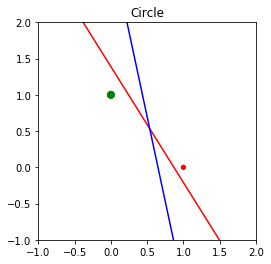

Layer ---------------
[0.945061475049241, 0.5915168584514376] 0.8210681466017347 0 : [0.0, 1.0] 0.4428628556350054
[0.486594082057332, 0.10401431172350484] 0.31574716364541655 1 : [0.0, 1.0] 0.4472636576726486
------------------------
0 activate     [0.945061475049241, 0.5915168584514376] 0.8210681466017347 : [1.0, 0.0] ==> 0.12399332844750632
0 transfer     0.12399332844750632 ==> 0.5309586781538098
1 activate     [0.486594082057332, 0.10401431172350484] 0.31574716364541655 : [1.0, 0.0] ==> 0.17084691841191546
1 transfer     0.17084691841191546 ==> 0.5426081404088451
0 activate     [0.945061475049241, 0.5915168584514376] 0.8210681466017347 : [0.0, 1.0] ==> -0.22955128815029702
0 transfer     -0.22955128815029702 ==> 0.4428628556350054
1 activate     [0.486594082057332, 0.10401431172350484] 0.31574716364541655 : [0.0, 1.0] ==> -0.2117328519219117
1 transfer     -0.2117328519219117 ==> 0.4472636576726486
>epoch=0, lrate=0.500, error=1.016


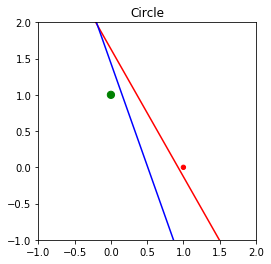

Layer ---------------
[0.945061475049241, 0.5368818983311227] 0.8757031067220497 0 : [0.0, 1.0] 0.4428628556350054
[0.486594082057332, 0.17233774096820292] 0.24742373440071846 1 : [0.0, 1.0] 0.4472636576726486
0 activate     [0.945061475049241, 0.5368818983311227] 0.8757031067220497 : [1.0, 0.0] ==> 0.06935836832719133
0 transfer     0.06935836832719133 ==> 0.5173326442947901
1 activate     [0.486594082057332, 0.17233774096820292] 0.24742373440071846 : [1.0, 0.0] ==> 0.23917034765661355
1 transfer     0.23917034765661355 ==> 0.5595091843714409
0 activate     [0.945061475049241, 0.5368818983311227] 0.8757031067220497 : [0.0, 1.0] ==> -0.338821208390927
0 transfer     -0.338821208390927 ==> 0.416095848027066
1 activate     [0.486594082057332, 0.17233774096820292] 0.24742373440071846 : [0.0, 1.0] ==> -0.07508599343251554
1 transfer     -0.07508599343251554 ==> 0.48123731600169367
>epoch=1, lrate=0.500, error=0.988


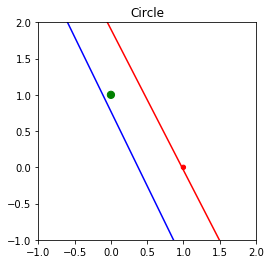

Layer ---------------
[0.945061475049241, 0.48633455530573005] 0.9262504497474422 0 : [0.0, 1.0] 0.416095848027066
[0.486594082057332, 0.23709176429849554] 0.18266971107042584 1 : [0.0, 1.0] 0.48123731600169367
0 activate     [0.945061475049241, 0.48633455530573005] 0.9262504497474422 : [1.0, 0.0] ==> 0.01881102530179879
0 transfer     0.01881102530179879 ==> 0.5047026176559981
1 activate     [0.486594082057332, 0.23709176429849554] 0.18266971107042584 : [1.0, 0.0] ==> 0.30392437098690617
1 transfer     0.30392437098690617 ==> 0.5754015805057946
0 activate     [0.945061475049241, 0.48633455530573005] 0.9262504497474422 : [0.0, 1.0] ==> -0.43991589444171214
0 transfer     -0.43991589444171214 ==> 0.39176101010688635
1 activate     [0.486594082057332, 0.23709176429849554] 0.18266971107042584 : [0.0, 1.0] ==> 0.0544220532280697
1 transfer     0.0544220532280697 ==> 0.5136021562793327
>epoch=2, lrate=0.500, error=0.966


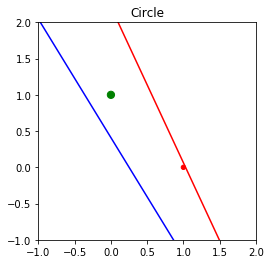

Layer ---------------
[0.945061475049241, 0.43965930214882526] 0.972925702904347 0 : [0.0, 1.0] 0.39176101010688635
[0.486594082057332, 0.2978464984260501] 0.12191497694287129 1 : [0.0, 1.0] 0.5136021562793327
0 activate     [0.945061475049241, 0.43965930214882526] 0.972925702904347 : [1.0, 0.0] ==> -0.027864227855106005
0 transfer     -0.027864227855106005 ==> 0.4930343937139379
1 activate     [0.486594082057332, 0.2978464984260501] 0.12191497694287129 : [1.0, 0.0] ==> 0.3646791051144607
1 transfer     0.3646791051144607 ==> 0.5901726396852394
0 activate     [0.945061475049241, 0.43965930214882526] 0.972925702904347 : [0.0, 1.0] ==> -0.5332664007555217
0 transfer     -0.5332664007555217 ==> 0.3697553746690667
1 activate     [0.486594082057332, 0.2978464984260501] 0.12191497694287129 : [0.0, 1.0] ==> 0.1759315214831788
1 transfer     0.1759315214831788 ==> 0.543869784267996
>epoch=3, lrate=0.500, error=0.950


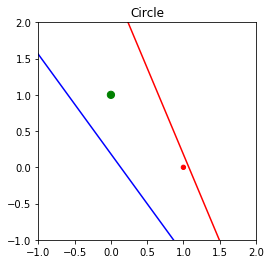

Layer ---------------
[0.945061475049241, 0.3965760829935294] 1.0160089220596429 0 : [0.0, 1.0] 0.3697553746690667
[0.486594082057332, 0.3544238508711358] 0.0653376244977856 1 : [0.0, 1.0] 0.543869784267996
0 activate     [0.945061475049241, 0.3965760829935294] 1.0160089220596429 : [1.0, 0.0] ==> -0.0709474470104019
0 transfer     -0.0709474470104019 ==> 0.48227057443832827
1 activate     [0.486594082057332, 0.3544238508711358] 0.0653376244977856 : [1.0, 0.0] ==> 0.42125645755954644
1 transfer     0.42125645755954644 ==> 0.6037838699963827
0 activate     [0.945061475049241, 0.3965760829935294] 1.0160089220596429 : [0.0, 1.0] ==> -0.6194328390661135
0 transfer     -0.6194328390661135 ==> 0.34991045431322043
1 activate     [0.486594082057332, 0.3544238508711358] 0.0653376244977856 : [0.0, 1.0] ==> 0.28908622637335024
1 transfer     0.28908622637335024 ==> 0.5717724113158402
>epoch=4, lrate=0.500, error=0.938


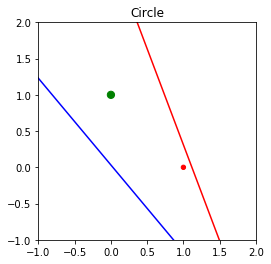

Layer ---------------
[0.945061475049241, 0.3567784701640583] 1.0558065348891141 0 : [0.0, 1.0] 0.34991045431322043
[0.486594082057332, 0.40684933955866487] 0.012912135810256561 1 : [0.0, 1.0] 0.5717724113158402
0 activate     [0.945061475049241, 0.3567784701640583] 1.0558065348891141 : [1.0, 0.0] ==> -0.11074505983987315
0 transfer     -0.11074505983987315 ==> 0.4723419968221617
1 activate     [0.486594082057332, 0.40684933955866487] 0.012912135810256561 : [1.0, 0.0] ==> 0.47368194624707544
1 transfer     0.47368194624707544 ==> 0.616254852630574
0 activate     [0.945061475049241, 0.3567784701640583] 1.0558065348891141 : [0.0, 1.0] ==> -0.6990280647250559
0 transfer     -0.6990280647250559 ==> 0.3320277536088178
1 activate     [0.486594082057332, 0.40684933955866487] 0.012912135810256561 : [0.0, 1.0] ==> 0.3939372037484083
1 transfer     0.3939372037484083 ==> 0.5972301405606002
>epoch=5, lrate=0.500, error=0.931


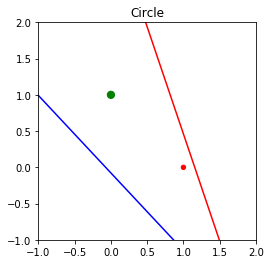

Layer ---------------
[0.945061475049241, 0.3199590286350684] 1.0926259764181039 0 : [0.0, 1.0] 0.3320277536088178
[0.486594082057332, 0.45529173923148863] -0.035530263862567184 1 : [0.0, 1.0] 0.5972301405606002
0 activate     [0.945061475049241, 0.3199590286350684] 1.0926259764181039 : [1.0, 0.0] ==> -0.1475645013688629
0 transfer     -0.1475645013688629 ==> 0.4631756720965796
1 activate     [0.486594082057332, 0.45529173923148863] -0.035530263862567184 : [1.0, 0.0] ==> 0.5221243459198992
1 transfer     0.5221243459198992 ==> 0.6276443751154284
0 activate     [0.945061475049241, 0.3199590286350684] 1.0926259764181039 : [0.0, 1.0] ==> -0.7726669477830355
0 transfer     -0.7726669477830355 ==> 0.31590247447055
1 activate     [0.486594082057332, 0.45529173923148863] -0.035530263862567184 : [0.0, 1.0] ==> 0.4908220030940558
1 transfer     0.4908220030940558 ==> 0.6203000561387212
>epoch=6, lrate=0.500, error=0.926


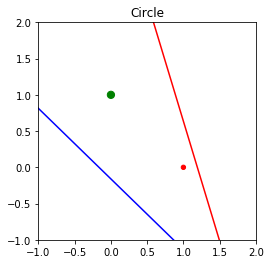

Layer ---------------
[0.945061475049241, 0.28582448669071575] 1.1267605183624565 0 : [0.0, 1.0] 0.31590247447055
[0.486594082057332, 0.5000067037695711] -0.08024522840064968 1 : [0.0, 1.0] 0.6203000561387212
0 activate     [0.945061475049241, 0.28582448669071575] 1.1267605183624565 : [1.0, 0.0] ==> -0.1816990433132155
0 transfer     -0.1816990433132155 ==> 0.45469980109317765
1 activate     [0.486594082057332, 0.5000067037695711] -0.08024522840064968 : [1.0, 0.0] ==> 0.5668393104579816
1 transfer     0.5668393104579816 ==> 0.6380335431320241
0 activate     [0.945061475049241, 0.28582448669071575] 1.1267605183624565 : [0.0, 1.0] ==> -0.8409360316717407
0 transfer     -0.8409360316717407 ==> 0.301337681538765
1 activate     [0.486594082057332, 0.5000067037695711] -0.08024522840064968 : [0.0, 1.0] ==> 0.5802519321702209
1 transfer     0.5802519321702209 ==> 0.6411253738634382
>epoch=7, lrate=0.500, error=0.924


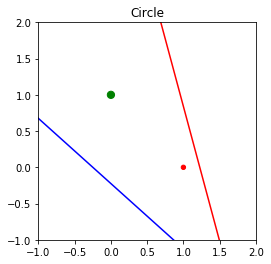

Layer ---------------
[0.945061475049241, 0.2541036809640428] 1.1584813240891294 0 : [0.0, 1.0] 0.301337681538765
[0.486594082057332, 0.5412922919117565] -0.12153081654283507 1 : [0.0, 1.0] 0.6411253738634382
0 activate     [0.945061475049241, 0.2541036809640428] 1.1584813240891294 : [1.0, 0.0] ==> -0.21341984903988842
0 transfer     -0.21341984903988842 ==> 0.4468466373371763
1 activate     [0.486594082057332, 0.5412922919117565] -0.12153081654283507 : [1.0, 0.0] ==> 0.608124898600167
1 transfer     0.608124898600167 ==> 0.6475129475385011
0 activate     [0.945061475049241, 0.2541036809640428] 1.1584813240891294 : [0.0, 1.0] ==> -0.9043776431250866
0 transfer     -0.9043776431250866 ==> 0.2881517217874601
1 activate     [0.486594082057332, 0.5412922919117565] -0.12153081654283507 : [0.0, 1.0] ==> 0.6628231084545916
1 transfer     0.6628231084545916 ==> 0.6598942751830371
>epoch=8, lrate=0.500, error=0.924


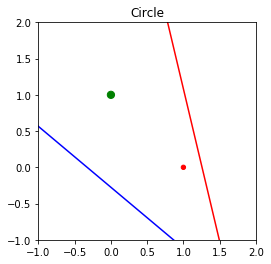

Layer ---------------
[0.945061475049241, 0.22455079614358314] 1.188034208909589 0 : [0.0, 1.0] 0.2881517217874601
[0.486594082057332, 0.5794579055538943] -0.15969643018497284 1 : [0.0, 1.0] 0.6598942751830371
0 activate     [0.945061475049241, 0.22455079614358314] 1.188034208909589 : [1.0, 0.0] ==> -0.242972733860348
0 transfer     -0.242972733860348 ==> 0.43955389776319703
1 activate     [0.486594082057332, 0.5794579055538943] -0.15969643018497284 : [1.0, 0.0] ==> 0.6462905122423048
1 transfer     0.6462905122423048 ==> 0.656174051894647
0 activate     [0.945061475049241, 0.22455079614358314] 1.188034208909589 : [0.0, 1.0] ==> -0.9634834127660059
0 transfer     -0.9634834127660059 ==> 0.27618129995500823
1 activate     [0.486594082057332, 0.5794579055538943] -0.15969643018497284 : [0.0, 1.0] ==> 0.7391543357388671
1 transfer     0.7391543357388671 ==> 0.6768109050760979
>epoch=9, lrate=0.500, error=0.925


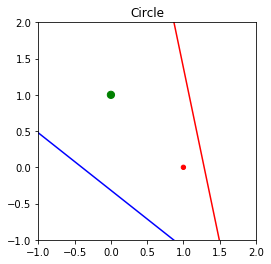

Layer ---------------
[0.945061475049241, 0.19694575859024763] 1.2156392464629244 0 : [0.0, 1.0] 0.27618129995500823
[0.486594082057332, 0.6148047581386921] -0.19504328276977062 1 : [0.0, 1.0] 0.6768109050760979
0 activate     [0.945061475049241, 0.19694575859024763] 1.2156392464629244 : [1.0, 0.0] ==> -0.27057777141368344
0 transfer     -0.27057777141368344 ==> 0.432765258496966
1 activate     [0.486594082057332, 0.6148047581386921] -0.19504328276977062 : [1.0, 0.0] ==> 0.6816373648271026
1 transfer     0.6816373648271026 ==> 0.6641040422384125
0 activate     [0.945061475049241, 0.19694575859024763] 1.2156392464629244 : [0.0, 1.0] ==> -1.0186934878726768
0 transfer     -1.0186934878726768 ==> 0.2652819713733389
1 activate     [0.486594082057332, 0.6148047581386921] -0.19504328276977062 : [0.0, 1.0] ==> 0.8098480409084627
1 transfer     0.8098480409084627 ==> 0.6920771217952301
>epoch=10, lrate=0.500, error=0.928


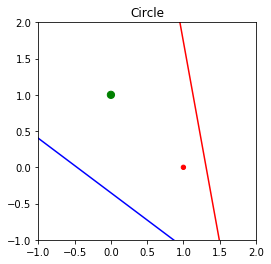

Layer ---------------
[0.945061475049241, 0.1710930426975062] 1.241491962355666 0 : [0.0, 1.0] 0.2652819713733389
[0.486594082057332, 0.6476149229749799] -0.22785344760605847 1 : [0.0, 1.0] 0.6920771217952301
0 activate     [0.945061475049241, 0.1710930426975062] 1.241491962355666 : [1.0, 0.0] ==> -0.29643048730642496
0 transfer     -0.29643048730642496 ==> 0.42643031123914754
1 activate     [0.486594082057332, 0.6476149229749799] -0.22785344760605847 : [1.0, 0.0] ==> 0.7144475296633905
1 transfer     0.7144475296633905 ==> 0.6713831554458074
0 activate     [0.945061475049241, 0.1710930426975062] 1.241491962355666 : [0.0, 1.0] ==> -1.0703989196581598
0 transfer     -1.0703989196581598 ==> 0.25532722808678915
1 activate     [0.486594082057332, 0.6476149229749799] -0.22785344760605847 : [0.0, 1.0] ==> 0.8754683705810384
1 transfer     0.8754683705810384 ==> 0.705882276794556
>epoch=11, lrate=0.500, error=0.931


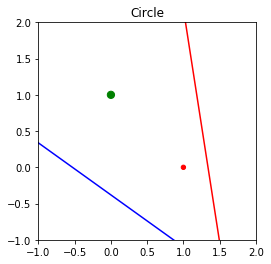

Layer ---------------
[0.945061475049241, 0.14681969148071872] 1.2657653135724534 0 : [0.0, 1.0] 0.25532722808678915
[0.486594082057332, 0.6781461791297525] -0.25838470376083106 1 : [0.0, 1.0] 0.705882276794556
0 activate     [0.945061475049241, 0.14681969148071872] 1.2657653135724534 : [1.0, 0.0] ==> -0.3207038385232124
0 transfer     -0.3207038385232124 ==> 0.42050422659297815
1 activate     [0.486594082057332, 0.6781461791297525] -0.25838470376083106 : [1.0, 0.0] ==> 0.7449787858181631
1 transfer     0.7449787858181631 ==> 0.6780836188054586
0 activate     [0.945061475049241, 0.14681969148071872] 1.2657653135724534 : [0.0, 1.0] ==> -1.1189456220917346
0 transfer     -1.1189456220917346 ==> 0.2462069121978408
1 activate     [0.486594082057332, 0.6781461791297525] -0.25838470376083106 : [0.0, 1.0] ==> 0.9365308828905836
1 transfer     0.9365308828905836 ==> 0.7183983796003564
>epoch=12, lrate=0.500, error=0.936


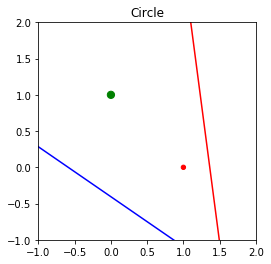

Layer ---------------
[0.945061475049241, 0.12397303572386777] 1.2886119693293043 0 : [0.0, 1.0] 0.2462069121978408
[0.486594082057332, 0.7066304854434584] -0.2868690100745369 1 : [0.0, 1.0] 0.7183983796003564
0 activate     [0.945061475049241, 0.12397303572386777] 1.2886119693293043 : [1.0, 0.0] ==> -0.34355049428006335
0 transfer     -0.34355049428006335 ==> 0.4149472781872745
1 activate     [0.486594082057332, 0.7066304854434584] -0.2868690100745369 : [1.0, 0.0] ==> 0.7734630921318689
1 transfer     0.7734630921318689 ==> 0.6842695535499485
0 activate     [0.945061475049241, 0.12397303572386777] 1.2886119693293043 : [0.0, 1.0] ==> -1.1646389336054366
0 transfer     -1.1646389336054366 ==> 0.23782538888708302
1 activate     [0.486594082057332, 0.7066304854434584] -0.2868690100745369 : [0.0, 1.0] ==> 0.9934994955179953
1 transfer     0.9934994955179953 ==> 0.7297785838353389
>epoch=13, lrate=0.500, error=0.940


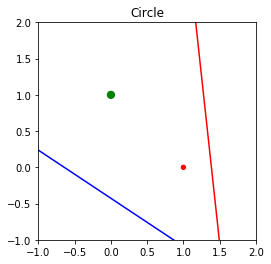

Layer ---------------
[0.945061475049241, 0.10241838879832721] 1.3101666162548449 0 : [0.0, 1.0] 0.23782538888708302
[0.486594082057332, 0.7332745606022699] -0.3135130852333484 1 : [0.0, 1.0] 0.7297785838353389
0 activate     [0.945061475049241, 0.10241838879832721] 1.3101666162548449 : [1.0, 0.0] ==> -0.3651051412056039
0 transfer     -0.3651051412056039 ==> 0.4097243193962043
1 activate     [0.486594082057332, 0.7332745606022699] -0.3135130852333484 : [1.0, 0.0] ==> 0.8001071672906804
1 transfer     0.8001071672906804 ==> 0.689997404783513
0 activate     [0.945061475049241, 0.10241838879832721] 1.3101666162548449 : [0.0, 1.0] ==> -1.2077482274565177
0 transfer     -1.2077482274565177 ==> 0.23009971864170295
1 activate     [0.486594082057332, 0.7332745606022699] -0.3135130852333484 : [0.0, 1.0] ==> 1.0467876458356185
1 transfer     1.0467876458356185 ==> 0.7401575620589884
>epoch=14, lrate=0.500, error=0.945


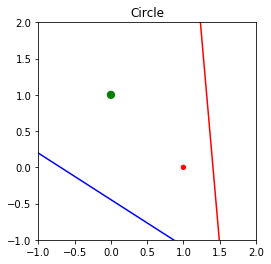

Layer ---------------
[0.945061475049241, 0.0820368646441603] 1.3305481404090118 0 : [0.0, 1.0] 0.23009971864170295
[0.486594082057332, 0.7582615739925084] -0.33850009862358693 1 : [0.0, 1.0] 0.7401575620589884
0 activate     [0.945061475049241, 0.0820368646441603] 1.3305481404090118 : [1.0, 0.0] ==> -0.38548666535977083
0 transfer     -0.38548666535977083 ==> 0.4048042646361575
1 activate     [0.486594082057332, 0.7582615739925084] -0.33850009862358693 : [1.0, 0.0] ==> 0.8250941806809189
1 transfer     0.8250941806809189 ==> 0.6953166220253031
0 activate     [0.945061475049241, 0.0820368646441603] 1.3305481404090118 : [0.0, 1.0] ==> -1.2485112757648515
0 transfer     -1.2485112757648515 ==> 0.2229579504999042
1 activate     [0.486594082057332, 0.7582615739925084] -0.33850009862358693 : [0.0, 1.0] ==> 1.0967616726160954
1 transfer     1.0967616726160954 ==> 0.7496528489785105
>epoch=15, lrate=0.500, error=0.950


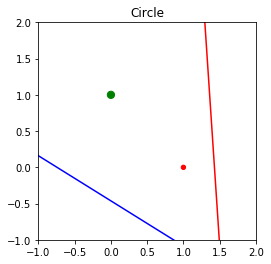

Layer ---------------
[0.945061475049241, 0.06272338827062854] 1.3498616167825437 0 : [0.0, 1.0] 0.2229579504999042
[0.486594082057332, 0.7817533313829268] -0.3619918560140054 1 : [0.0, 1.0] 0.7496528489785105
0 activate     [0.945061475049241, 0.06272338827062854] 1.3498616167825437 : [1.0, 0.0] ==> -0.4048001417333027
0 transfer     -0.4048001417333027 ==> 0.40015960253711774
1 activate     [0.486594082057332, 0.7817533313829268] -0.3619918560140054 : [1.0, 0.0] ==> 0.8485859380713374
1 transfer     0.8485859380713374 ==> 0.700270426610182
0 activate     [0.945061475049241, 0.06272338827062854] 1.3498616167825437 : [0.0, 1.0] ==> -1.287138228511915
0 transfer     -1.287138228511915 ==> 0.21633758921105628
1 activate     [0.486594082057332, 0.7817533313829268] -0.3619918560140054 : [0.0, 1.0] ==> 1.1437451873969322
1 transfer     1.1437451873969322 ==> 0.7583665961608186
>epoch=16, lrate=0.500, error=0.955


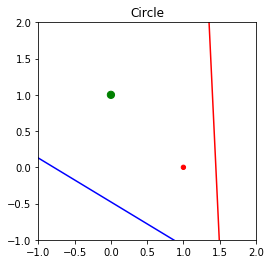

Layer ---------------
[0.945061475049241, 0.044384922805524196] 1.368200082247648 0 : [0.0, 1.0] 0.21633758921105628
[0.486594082057332, 0.803892593554792] -0.3841311181858706 1 : [0.0, 1.0] 0.7583665961608186
0 activate     [0.945061475049241, 0.044384922805524196] 1.368200082247648 : [1.0, 0.0] ==> -0.4231386071984071
0 transfer     -0.4231386071984071 ==> 0.3957659534691288
1 activate     [0.486594082057332, 0.803892593554792] -0.3841311181858706 : [1.0, 0.0] ==> 0.8707252002432027
1 transfer     0.8707252002432027 ==> 0.7048965746748937
0 activate     [0.945061475049241, 0.044384922805524196] 1.368200082247648 : [0.0, 1.0] ==> -1.323815159442124
0 transfer     -1.323815159442124 ==> 0.2101842506595167
1 activate     [0.486594082057332, 0.803892593554792] -0.3841311181858706 : [0.0, 1.0] ==> 1.1880237117406627
1 transfer     1.1880237117406627 ==> 0.7663874203343586
>epoch=17, lrate=0.500, error=0.961


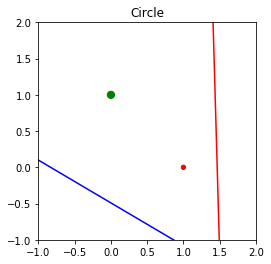

Layer ---------------
[0.945061475049241, 0.026938912070843694] 1.3856460929823287 0 : [0.0, 1.0] 0.2101842506595167
[0.486594082057332, 0.824805327971452] -0.4050438526025305 1 : [0.0, 1.0] 0.7663874203343586
0 activate     [0.945061475049241, 0.026938912070843694] 1.3856460929823287 : [1.0, 0.0] ==> -0.4405846179330877
0 transfer     -0.4405846179330877 ==> 0.3916016753226635
1 activate     [0.486594082057332, 0.824805327971452] -0.4050438526025305 : [1.0, 0.0] ==> 0.8916379346598625
1 transfer     0.8916379346598625 ==> 0.7092280690952202
0 activate     [0.945061475049241, 0.026938912070843694] 1.3856460929823287 : [0.0, 1.0] ==> -1.358707180911485
0 transfer     -1.358707180911485 ==> 0.20445049960196093
1 activate     [0.486594082057332, 0.824805327971452] -0.4050438526025305 : [0.0, 1.0] ==> 1.2298491805739826
1 transfer     1.2298491805739826 ==> 0.7737921762523647
>epoch=18, lrate=0.500, error=0.966


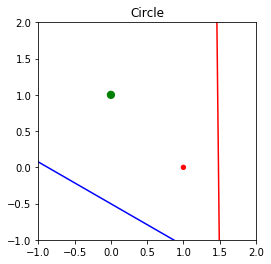

Layer ---------------
[0.945061475049241, 0.010311924812631972] 1.4022730802405403 0 : [0.0, 1.0] 0.20445049960196093
[0.486594082057332, 0.8446027928790325] -0.42484131751011106 1 : [0.0, 1.0] 0.7737921762523647
0 activate     [0.945061475049241, 0.010311924812631972] 1.4022730802405403 : [1.0, 0.0] ==> -0.45721160519129933
0 transfer     -0.45721160519129933 ==> 0.38764751670479364
1 activate     [0.486594082057332, 0.8446027928790325] -0.42484131751011106 : [1.0, 0.0] ==> 0.9114353995674431
1 transfer     0.9114353995674431 ==> 0.7132938000744553
0 activate     [0.945061475049241, 0.010311924812631972] 1.4022730802405403 : [0.0, 1.0] ==> -1.3919611554279083
0 transfer     -1.3919611554279083 ==> 0.19909485411559205
1 activate     [0.486594082057332, 0.8446027928790325] -0.42484131751011106 : [0.0, 1.0] ==> 1.2694441103891436
1 transfer     1.2694441103891436 ==> 0.7806475739270609
>epoch=19, lrate=0.500, error=0.972


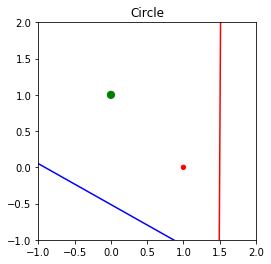

Layer ---------------
[0.945061475049241, -0.005561518992153392] 1.4181465240453257 0 : [0.0, 1.0] 0.19909485411559205
[0.486594082057332, 0.8633834119078029] -0.4436219365388815 1 : [0.0, 1.0] 0.7806475739270609
0 activate     [0.945061475049241, -0.005561518992153392] 1.4181465240453257 : [1.0, 0.0] ==> -0.4730850489960847
0 transfer     -0.4730850489960847 ==> 0.3838863142936548
1 activate     [0.486594082057332, 0.8633834119078029] -0.4436219365388815 : [1.0, 0.0] ==> 0.9302160185962135
1 transfer     0.9302160185962135 ==> 0.7171191089278016
0 activate     [0.945061475049241, -0.005561518992153392] 1.4181465240453257 : [0.0, 1.0] ==> -1.423708043037479
0 transfer     -1.423708043037479 ==> 0.1940809375040684
1 activate     [0.486594082057332, 0.8633834119078029] -0.4436219365388815 : [0.0, 1.0] ==> 1.3070053484466844
1 transfer     1.3070053484466844 ==> 0.7870116108542251
>epoch=20, lrate=0.500, error=0.977


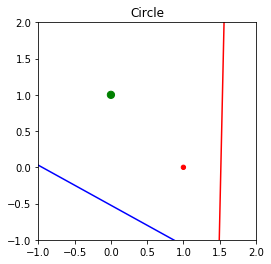

Layer ---------------
[0.945061475049241, -0.020739960990956707] 1.433324966044129 0 : [0.0, 1.0] 0.1940809375040684
[0.486594082057332, 0.8812344304794553] -0.4614729551105339 1 : [0.0, 1.0] 0.7870116108542251
0 activate     [0.945061475049241, -0.020739960990956707] 1.433324966044129 : [1.0, 0.0] ==> -0.48826349099488797
0 transfer     -0.48826349099488797 ==> 0.3803027300363726
1 activate     [0.486594082057332, 0.8812344304794553] -0.4614729551105339 : [1.0, 0.0] ==> 0.9480670371678659
1 transfer     0.9480670371678659 ==> 0.7207262774848675
0 activate     [0.945061475049241, -0.020739960990956707] 1.433324966044129 : [0.0, 1.0] ==> -1.4540649270350856
0 transfer     -1.4540649270350856 ==> 0.18937675799192766
1 activate     [0.486594082057332, 0.8812344304794553] -0.4614729551105339 : [0.0, 1.0] ==> 1.3427073855899891
1 transfer     1.3427073855899891 ==> 0.7929348174486438
>epoch=21, lrate=0.500, error=0.982


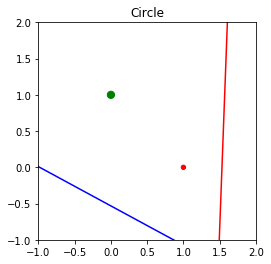

Layer ---------------
[0.945061475049241, -0.03527587719778234] 1.4478608822509547 0 : [0.0, 1.0] 0.18937675799192766
[0.486594082057332, 0.898233363061874] -0.4784718876929525 1 : [0.0, 1.0] 0.7929348174486438
0 activate     [0.945061475049241, -0.03527587719778234] 1.4478608822509547 : [1.0, 0.0] ==> -0.5027994072017137
0 transfer     -0.5027994072017137 ==> 0.37688302359293513
1 activate     [0.486594082057332, 0.898233363061874] -0.4784718876929525 : [1.0, 0.0] ==> 0.9650659697502846
1 transfer     0.9650659697502846 ==> 0.7241349493155005
0 activate     [0.945061475049241, -0.03527587719778234] 1.4478608822509547 : [0.0, 1.0] ==> -1.483136759448737
0 transfer     -1.483136759448737 ==> 0.18495409774459234
1 activate     [0.486594082057332, 0.898233363061874] -0.4784718876929525 : [0.0, 1.0] ==> 1.3767052507548265
1 transfer     1.3767052507548265 ==> 0.7984613277824678
>epoch=22, lrate=0.500, error=0.987


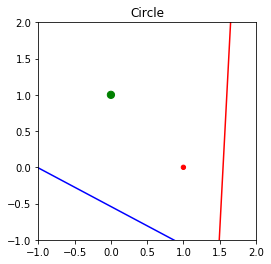

Layer ---------------
[0.945061475049241, -0.04921642975642857] 1.461801434809601 0 : [0.0, 1.0] 0.18495409774459234
[0.486594082057332, 0.9144492488533544] -0.494687773484433 1 : [0.0, 1.0] 0.7984613277824678
0 activate     [0.945061475049241, -0.04921642975642857] 1.461801434809601 : [1.0, 0.0] ==> -0.5167399597603599
0 transfer     -0.5167399597603599 ==> 0.37361485556513924
1 activate     [0.486594082057332, 0.9144492488533544] -0.494687773484433 : [1.0, 0.0] ==> 0.9812818555417651
1 transfer     0.9812818555417651 ==> 0.7273624904404298
0 activate     [0.945061475049241, -0.04921642975642857] 1.461801434809601 : [0.0, 1.0] ==> -1.5110178645660295
0 transfer     -1.5110178645660295 ==> 0.180787994664633
1 activate     [0.486594082057332, 0.9144492488533544] -0.494687773484433 : [0.0, 1.0] ==> 1.4091370223377875
1 transfer     1.4091370223377875 ==> 0.8036297937201144
>epoch=23, lrate=0.500, error=0.993


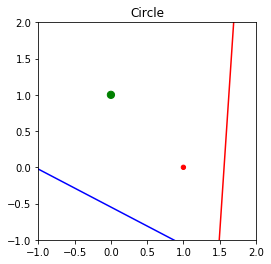

Layer ---------------
[0.945061475049241, -0.06260411482590042] 1.4751891198790728 0 : [0.0, 1.0] 0.180787994664633
[0.486594082057332, 0.9299437367250251] -0.5101822613561037 1 : [0.0, 1.0] 0.8036297937201144
0 activate     [0.945061475049241, -0.06260411482590042] 1.4751891198790728 : [1.0, 0.0] ==> -0.5301276448298318
0 transfer     -0.5301276448298318 ==> 0.37048711739465756
1 activate     [0.486594082057332, 0.9299437367250251] -0.5101822613561037 : [1.0, 0.0] ==> 0.9967763434134357
1 transfer     0.9967763434134357 ==> 0.7304242973790839
0 activate     [0.945061475049241, -0.06260411482590042] 1.4751891198790728 : [0.0, 1.0] ==> -1.5377932347049732
0 transfer     -1.5377932347049732 ==> 0.17685630253408177
1 activate     [0.486594082057332, 0.9299437367250251] -0.5101822613561037 : [0.0, 1.0] ==> 1.4401259980811287
1 transfer     1.4401259980811287 ==> 0.8084741622048073
>epoch=24, lrate=0.500, error=0.998


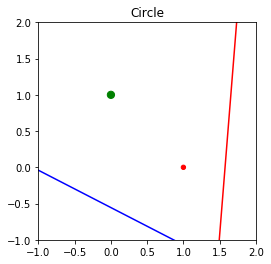

Layer ---------------
[0.945061475049241, -0.07547732156496265] 1.488062326618135 0 : [0.0, 1.0] 0.17685630253408177
[0.486594082057332, 0.9447720205721988] -0.5250105452032774 1 : [0.0, 1.0] 0.8084741622048073
0 activate     [0.945061475049241, -0.07547732156496265] 1.488062326618135 : [1.0, 0.0] ==> -0.543000851568894
0 transfer     -0.543000851568894 ==> 0.36748978424498185
1 activate     [0.486594082057332, 0.9447720205721988] -0.5250105452032774 : [1.0, 0.0] ==> 1.0116046272606094
1 transfer     1.0116046272606094 ==> 0.7333340599354309
0 activate     [0.945061475049241, -0.07547732156496265] 1.488062326618135 : [0.0, 1.0] ==> -1.5635396481830977
0 transfer     -1.5635396481830977 ==> 0.17313931713641717
1 activate     [0.486594082057332, 0.9447720205721988] -0.5250105452032774 : [0.0, 1.0] ==> 1.4697825657754762
1 transfer     1.4697825657754762 ==> 0.8130243348514699
>epoch=25, lrate=0.500, error=1.003


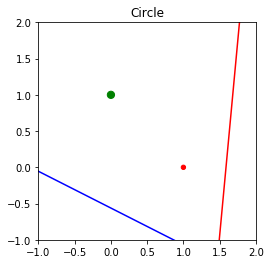

Layer ---------------
[0.945061475049241, -0.08787081516227516] 1.5004558202154474 0 : [0.0, 1.0] 0.17313931713641717
[0.486594082057332, 0.9589836450330973] -0.5392221696641759 1 : [0.0, 1.0] 0.8130243348514699
0 activate     [0.945061475049241, -0.08787081516227516] 1.5004558202154474 : [1.0, 0.0] ==> -0.5553943451662064
0 transfer     -0.5553943451662064 ==> 0.3646137876297924
1 activate     [0.486594082057332, 0.9589836450330973] -0.5392221696641759 : [1.0, 0.0] ==> 1.025816251721508
1 transfer     1.025816251721508 ==> 0.73610398538527
0 activate     [0.945061475049241, -0.08787081516227516] 1.5004558202154474 : [0.0, 1.0] ==> -1.5883266353777226
0 transfer     -1.5883266353777226 ==> 0.16961945787716529
1 activate     [0.486594082057332, 0.9589836450330973] -0.5392221696641759 : [0.0, 1.0] ==> 1.4982058146972732
1 transfer     1.4982058146972732 ==> 0.8173067273332686
>epoch=26, lrate=0.500, error=1.008


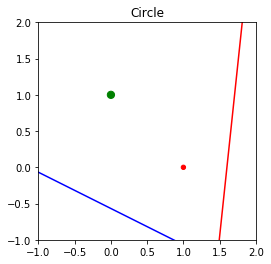

Layer ---------------
[0.945061475049241, -0.09981615500898701] 1.5124011600621592 0 : [0.0, 1.0] 0.16961945787716529
[0.486594082057332, 0.9726231996484472] -0.5528617242795258 1 : [0.0, 1.0] 0.8173067273332686
0 activate     [0.945061475049241, -0.09981615500898701] 1.5124011600621592 : [1.0, 0.0] ==> -0.5673396850129182
0 transfer     -0.5673396850129182 ==> 0.36185090497865235
1 activate     [0.486594082057332, 0.9726231996484472] -0.5528617242795258 : [1.0, 0.0] ==> 1.039455806336858
1 transfer     1.039455806336858 ==> 0.7387449899023554
0 activate     [0.945061475049241, -0.09981615500898701] 1.5124011600621592 : [0.0, 1.0] ==> -1.6122173150711463
0 transfer     -1.6122173150711463 ==> 0.1662809960821903
1 activate     [0.486594082057332, 0.9726231996484472] -0.5528617242795258 : [0.0, 1.0] ==> 1.525484923927973
1 transfer     1.525484923927973 ==> 0.8213447439814503
>epoch=27, lrate=0.500, error=1.013


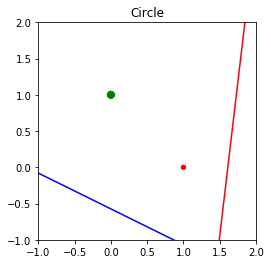

Layer ---------------
[0.945061475049241, -0.11134205747413414] 1.5239270625273063 0 : [0.0, 1.0] 0.1662809960821903
[0.486594082057332, 0.9857309174225258] -0.5659694420536044 1 : [0.0, 1.0] 0.8213447439814503
0 activate     [0.945061475049241, -0.11134205747413414] 1.5239270625273063 : [1.0, 0.0] ==> -0.5788655874780653
0 transfer     -0.5788655874780653 ==> 0.359193663722272
1 activate     [0.486594082057332, 0.9857309174225258] -0.5659694420536044 : [1.0, 0.0] ==> 1.0525635241109366
1 transfer     1.0525635241109366 ==> 0.7412668622499748
0 activate     [0.945061475049241, -0.11134205747413414] 1.5239270625273063 : [0.0, 1.0] ==> -1.6352691200014404
0 transfer     -1.6352691200014404 ==> 0.1631098225817935
1 activate     [0.486594082057332, 0.9857309174225258] -0.5659694420536044 : [0.0, 1.0] ==> 1.5517003594761303
1 transfer     1.5517003594761303 ==> 0.8251591809067301
>epoch=28, lrate=0.500, error=1.017


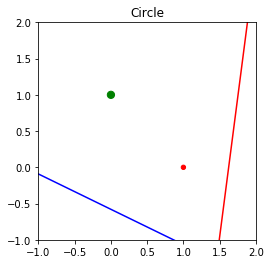

Layer ---------------
[0.945061475049241, -0.12247471132162606] 1.535059716374798 0 : [0.0, 1.0] 0.1631098225817935
[0.486594082057332, 0.998343191656676] -0.5785817162877546 1 : [0.0, 1.0] 0.8251591809067301
0 activate     [0.945061475049241, -0.12247471132162606] 1.535059716374798 : [1.0, 0.0] ==> -0.5899982413255571
0 transfer     -0.5899982413255571 ==> 0.3566352578272812
1 activate     [0.486594082057332, 0.998343191656676] -0.5785817162877546 : [1.0, 0.0] ==> 1.0651757983450865
1 transfer     1.0651757983450865 ==> 0.7436784040191878
0 activate     [0.945061475049241, -0.12247471132162606] 1.535059716374798 : [0.0, 1.0] ==> -1.6575344276964241
0 transfer     -1.6575344276964241 ==> 0.160093248401138
1 activate     [0.486594082057332, 0.998343191656676] -0.5785817162877546 : [0.0, 1.0] ==> 1.5769249079444305
1 transfer     1.5769249079444305 ==> 0.8287685689728306
>epoch=29, lrate=0.500, error=1.022


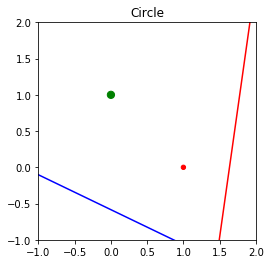

Layer ---------------
[0.945061475049241, -0.13323805258756774] 1.5458230576407397 0 : [0.0, 1.0] 0.160093248401138
[0.486594082057332, 1.010493022986064] -0.5907315476171426 1 : [0.0, 1.0] 0.8287685689728306
0 activate     [0.945061475049241, -0.13323805258756774] 1.5458230576407397 : [1.0, 0.0] ==> -0.6007615825914987
0 transfer     -0.6007615825914987 ==> 0.3541694750138506
1 activate     [0.486594082057332, 1.010493022986064] -0.5907315476171426 : [1.0, 0.0] ==> 1.0773256296744746
1 transfer     1.0773256296744746 ==> 0.7459875500347439
0 activate     [0.945061475049241, -0.13323805258756774] 1.5458230576407397 : [0.0, 1.0] ==> -1.6790611102283075
0 transfer     -1.6790611102283075 ==> 0.15721983339647755
1 activate     [0.486594082057332, 1.010493022986064] -0.5907315476171426 : [0.0, 1.0] ==> 1.6012245706032067
1 transfer     1.6012245706032067 ==> 0.8321894661854132
>epoch=30, lrate=0.500, error=1.026


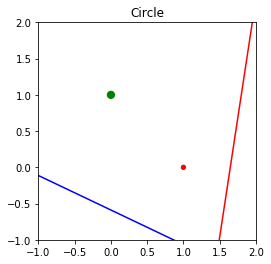

Layer ---------------
[0.945061475049241, -0.14365400469783615] 1.5562390097510082 0 : [0.0, 1.0] 0.15721983339647755
[0.486594082057332, 1.0222104068133049] -0.6024489314443835 1 : [0.0, 1.0] 0.8321894661854132
0 activate     [0.945061475049241, -0.14365400469783615] 1.5562390097510082 : [1.0, 0.0] ==> -0.6111775347017672
0 transfer     -0.6111775347017672 ==> 0.351790633151164
1 activate     [0.486594082057332, 1.0222104068133049] -0.6024489314443835 : [1.0, 0.0] ==> 1.0890430135017155
1 transfer     1.0890430135017155 ==> 0.7482014719783182
0 activate     [0.945061475049241, -0.14365400469783615] 1.5562390097510082 : [0.0, 1.0] ==> -1.6998930144488442
0 transfer     -1.6998930144488442 ==> 0.1544792385279041
1 activate     [0.486594082057332, 1.0222104068133049] -0.6024489314443835 : [0.0, 1.0] ==> 1.6246593382576884
1 transfer     1.6246593382576884 ==> 0.8354367075241447
>epoch=31, lrate=0.500, error=1.031


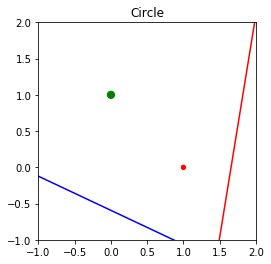

Layer ---------------
[0.945061475049241, -0.1537426887258219] 1.5663276937789938 0 : [0.0, 1.0] 0.1544792385279041
[0.486594082057332, 1.0335226698121303] -0.613761194443209 1 : [0.0, 1.0] 0.8354367075241447
0 activate     [0.945061475049241, -0.1537426887258219] 1.5663276937789938 : [1.0, 0.0] ==> -0.6212662187297529
0 transfer     -0.6212662187297529 ==> 0.3494935245496308
1 activate     [0.486594082057332, 1.0335226698121303] -0.613761194443209 : [1.0, 0.0] ==> 1.100355276500541
1 transfer     1.100355276500541 ==> 0.7503266677913829
0 activate     [0.945061475049241, -0.1537426887258219] 1.5663276937789938 : [0.0, 1.0] ==> -1.7200703825048158
0 transfer     -1.7200703825048158 ==> 0.15186209816782067
1 activate     [0.486594082057332, 1.0335226698121303] -0.613761194443209 : [0.0, 1.0] ==> 1.6472838642553391
1 transfer     1.6472838642553391 ==> 0.8385236189351188
>epoch=32, lrate=0.500, error=1.035


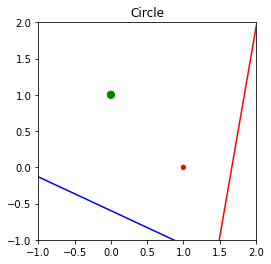

Layer ---------------
[0.945061475049241, -0.16352260794713885] 1.5761076130003109 0 : [0.0, 1.0] 0.15186209816782067
[0.486594082057332, 1.0444547628628578] -0.6246932874939365 1 : [0.0, 1.0] 0.8385236189351188
0 activate     [0.945061475049241, -0.16352260794713885] 1.5761076130003109 : [1.0, 0.0] ==> -0.6310461379510699
0 transfer     -0.6310461379510699 ==> 0.3472733670593056
1 activate     [0.486594082057332, 1.0444547628628578] -0.6246932874939365 : [1.0, 0.0] ==> 1.1112873695512686
1 transfer     1.1112873695512686 ==> 0.7523690390083906
0 activate     [0.945061475049241, -0.16352260794713885] 1.5761076130003109 : [0.0, 1.0] ==> -1.7396302209474497
0 transfer     -1.7396302209474497 ==> 0.1493599094328101
1 activate     [0.486594082057332, 1.0444547628628578] -0.6246932874939365 : [0.0, 1.0] ==> 1.6691480503567941
1 transfer     1.6691480503567941 ==> 0.8414622010951748
>epoch=33, lrate=0.500, error=1.040


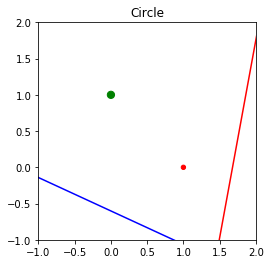

Layer ---------------
[0.945061475049241, -0.17301081022171258] 1.5855958152748846 0 : [0.0, 1.0] 0.1493599094328101
[0.486594082057332, 1.055029516661132] -0.6352680412922107 1 : [0.0, 1.0] 0.8414622010951748
0 activate     [0.945061475049241, -0.17301081022171258] 1.5855958152748846 : [1.0, 0.0] ==> -0.6405343402256436
0 transfer     -0.6405343402256436 ==> 0.34512576104569126
1 activate     [0.486594082057332, 1.055029516661132] -0.6352680412922107 : [1.0, 0.0] ==> 1.1218621233495427
1 transfer     1.1218621233495427 ==> 0.7543339578253089
0 activate     [0.945061475049241, -0.17301081022171258] 1.5855958152748846 : [0.0, 1.0] ==> -1.758606625496597
0 transfer     -1.758606625496597 ==> 0.14696493601491648
1 activate     [0.486594082057332, 1.055029516661132] -0.6352680412922107 : [0.0, 1.0] ==> 1.6902975579533428
1 transfer     1.6902975579533428 ==> 0.8442632876336755
>epoch=34, lrate=0.500, error=1.044


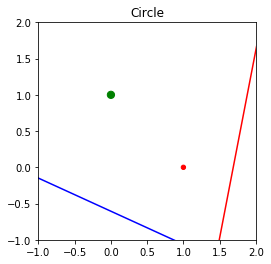

Layer ---------------
[0.945061475049241, -0.18222303120604788] 1.5948080362592199 0 : [0.0, 1.0] 0.14696493601491648
[0.486594082057332, 1.0652678652904046] -0.6455063899214831 1 : [0.0, 1.0] 0.8442632876336755
0 activate     [0.945061475049241, -0.18222303120604788] 1.5948080362592199 : [1.0, 0.0] ==> -0.6497465612099789
0 transfer     -0.6497465612099789 ==> 0.34304665145103674
1 activate     [0.486594082057332, 1.0652678652904046] -0.6455063899214831 : [1.0, 0.0] ==> 1.132100471978815
1 transfer     1.132100471978815 ==> 0.7562263254194601
0 activate     [0.945061475049241, -0.18222303120604788] 1.5948080362592199 : [0.0, 1.0] ==> -1.7770310674652676
0 transfer     -1.7770310674652676 ==> 0.14467012439361188
1 activate     [0.486594082057332, 1.0652678652904046] -0.6455063899214831 : [0.0, 1.0] ==> 1.7107742552118879
1 transfer     1.7107742552118879 ==> 0.8469366817254902
>epoch=35, lrate=0.500, error=1.048


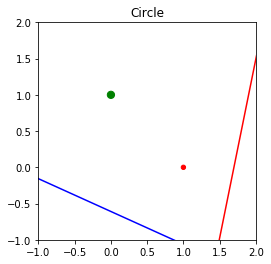

Layer ---------------
[0.945061475049241, -0.19117382095406743] 1.6037588260072395 0 : [0.0, 1.0] 0.14467012439361188
[0.486594082057332, 1.0751890422445354] -0.6554275668756139 1 : [0.0, 1.0] 0.8469366817254902
0 activate     [0.945061475049241, -0.19117382095406743] 1.6037588260072395 : [1.0, 0.0] ==> -0.6586973509579985
0 transfer     -0.6586973509579985 ==> 0.34103229426510945
1 activate     [0.486594082057332, 1.0751890422445354] -0.6554275668756139 : [1.0, 0.0] ==> 1.1420216489329458
1 transfer     1.1420216489329458 ==> 0.7580506227953162
0 activate     [0.945061475049241, -0.19117382095406743] 1.6037588260072395 : [0.0, 1.0] ==> -1.794932646961307
0 transfer     -1.794932646961307 ==> 0.1424690306462406
1 activate     [0.486594082057332, 1.0751890422445354] -0.6554275668756139 : [0.0, 1.0] ==> 1.7306166091201494
1 transfer     1.7306166091201494 ==> 0.8494912743273337
>epoch=36, lrate=0.500, error=1.052


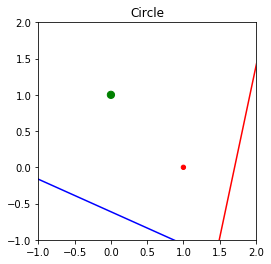

Layer ---------------
[0.945061475049241, -0.19987665609037386] 1.6124616611435458 0 : [0.0, 1.0] 0.1424690306462406
[0.486594082057332, 1.084810752708651] -0.6650492773397295 1 : [0.0, 1.0] 0.8494912743273337
0 activate     [0.945061475049241, -0.19987665609037386] 1.6124616611435458 : [1.0, 0.0] ==> -0.6674001860943048
0 transfer     -0.6674001860943048 ==> 0.33907922682743874
1 activate     [0.486594082057332, 1.084810752708651] -0.6650492773397295 : [1.0, 0.0] ==> 1.1516433593970614
1 transfer     1.1516433593970614 ==> 0.7598109552296771
0 activate     [0.945061475049241, -0.19987665609037386] 1.6124616611435458 : [0.0, 1.0] ==> -1.8123383172339196
0 transfer     -1.8123383172339196 ==> 0.1403557563544867
1 activate     [0.486594082057332, 1.084810752708651] -0.6650492773397295 : [0.0, 1.0] ==> 1.7498600300483806
1 transfer     1.7498600300483806 ==> 0.8519351467970487
>epoch=37, lrate=0.500, error=1.056


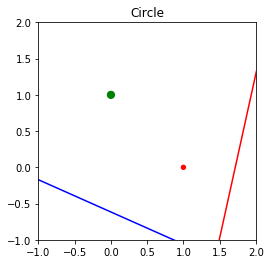

Layer ---------------
[0.945061475049241, -0.20834403942381666] 1.6209290444769886 0 : [0.0, 1.0] 0.1403557563544867
[0.486594082057332, 1.094149325334966] -0.6743878499660445 1 : [0.0, 1.0] 0.8519351467970487
0 activate     [0.945061475049241, -0.20834403942381666] 1.6209290444769886 : [1.0, 0.0] ==> -0.6758675694277476
0 transfer     -0.6758675694277476 ==> 0.33718424146597814
1 activate     [0.486594082057332, 1.094149325334966] -0.6743878499660445 : [1.0, 0.0] ==> 1.1609819320233765
1 transfer     1.1609819320233765 ==> 0.7615110912218712
0 activate     [0.945061475049241, -0.20834403942381666] 1.6209290444769886 : [0.0, 1.0] ==> -1.8292730839008053
0 transfer     -1.8292730839008053 ==> 0.13832489233731818
1 activate     [0.486594082057332, 1.094149325334966] -0.6743878499660445 : [0.0, 1.0] ==> 1.7685371753010104
1 transfer     1.7685371753010104 ==> 0.8542756601934912
>epoch=38, lrate=0.500, error=1.060


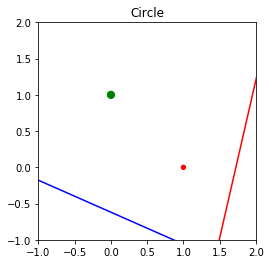

Layer ---------------
[0.945061475049241, -0.21658758860233576] 1.6291725936555077 0 : [0.0, 1.0] 0.13832489233731818
[0.486594082057332, 1.1032198462689968] -0.6834583709000753 1 : [0.0, 1.0] 0.8542756601934912
0 activate     [0.945061475049241, -0.21658758860233576] 1.6291725936555077 : [1.0, 0.0] ==> -0.6841111186062667
0 transfer     -0.6841111186062667 ==> 0.33534436204740037
1 activate     [0.486594082057332, 1.1032198462689968] -0.6834583709000753 : [1.0, 0.0] ==> 1.1700524529574072
1 transfer     1.1700524529574072 ==> 0.7631544967146066
0 activate     [0.945061475049241, -0.21658758860233576] 1.6291725936555077 : [0.0, 1.0] ==> -1.8457601822578436
0 transfer     -1.8457601822578436 ==> 0.13637146913510845
1 activate     [0.486594082057332, 1.1032198462689968] -0.6834583709000753 : [0.0, 1.0] ==> 1.7866782171690723
1 transfer     1.7866782171690723 ==> 0.85651953318785
>epoch=39, lrate=0.500, error=1.063


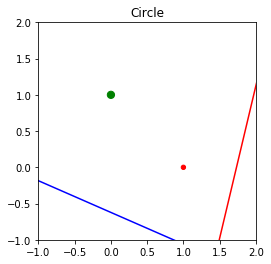

Layer ---------------
[0.945061475049241, -0.2246181151842349] 1.6372031202374069 0 : [0.0, 1.0] 0.13637146913510845
[0.486594082057332, 1.1120362777761204] -0.6922748024071989 1 : [0.0, 1.0] 0.85651953318785
0 activate     [0.945061475049241, -0.2246181151842349] 1.6372031202374069 : [1.0, 0.0] ==> -0.6921416451881659
0 transfer     -0.6921416451881659 ==> 0.33355682307381557
1 activate     [0.486594082057332, 1.1120362777761204] -0.6922748024071989 : [1.0, 0.0] ==> 1.178868884464531
1 transfer     1.178868884464531 ==> 0.7647443652341651
0 activate     [0.945061475049241, -0.2246181151842349] 1.6372031202374069 : [0.0, 1.0] ==> -1.8618212354216417
0 transfer     -1.8618212354216417 ==> 0.1344909133319493
1 activate     [0.486594082057332, 1.1120362777761204] -0.6922748024071989 : [0.0, 1.0] ==> 1.8043110801833193
1 transfer     1.8043110801833193 ==> 0.858672910212455
>epoch=40, lrate=0.500, error=1.067


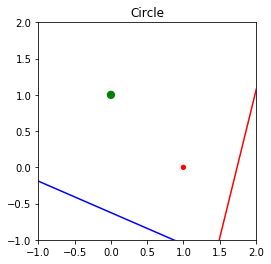

Layer ---------------
[0.945061475049241, -0.23244569530965328] 1.6450307003628253 0 : [0.0, 1.0] 0.1344909133319493
[0.486594082057332, 1.1206115634765275] -0.700850088107606 1 : [0.0, 1.0] 0.858672910212455
0 activate     [0.945061475049241, -0.23244569530965328] 1.6450307003628253 : [1.0, 0.0] ==> -0.6999692253135843
0 transfer     -0.6999692253135843 ==> 0.33181905101129955
1 activate     [0.486594082057332, 1.1206115634765275] -0.700850088107606 : [1.0, 0.0] ==> 1.1874441701649379
1 transfer     1.1874441701649379 ==> 0.7662836445008022
0 activate     [0.945061475049241, -0.23244569530965328] 1.6450307003628253 : [0.0, 1.0] ==> -1.8774763956724785
0 transfer     -1.8774763956724785 ==> 0.13267900893909118
1 activate     [0.486594082057332, 1.1206115634765275] -0.700850088107606 : [0.0, 1.0] ==> 1.8214616515841335
1 transfer     1.8214616515841335 ==> 0.8607414212195658
>epoch=41, lrate=0.500, error=1.071


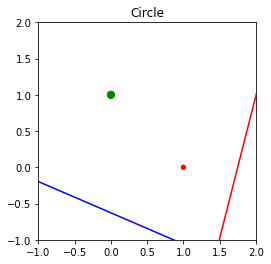

Layer ---------------
[0.945061475049241, -0.24007973299349972] 1.6526647380466717 0 : [0.0, 1.0] 0.13267900893909118
[0.486594082057332, 1.1289577219079983] -0.7091962465390769 1 : [0.0, 1.0] 0.8607414212195658
0 activate     [0.945061475049241, -0.24007973299349972] 1.6526647380466717 : [1.0, 0.0] ==> -0.7076032629974307
0 transfer     -0.7076032629974307 ==> 0.33012864757864957
1 activate     [0.486594082057332, 1.1289577219079983] -0.7091962465390769 : [1.0, 0.0] ==> 1.1957903285964089
1 transfer     1.1957903285964089 ==> 0.7677750599782494
0 activate     [0.945061475049241, -0.24007973299349972] 1.6526647380466717 : [0.0, 1.0] ==> -1.8927444710401713
0 transfer     -1.8927444710401713 ==> 0.13093186317651154
1 activate     [0.486594082057332, 1.1289577219079983] -0.7091962465390769 : [0.0, 1.0] ==> 1.8381539684470751
1 transfer     1.8381539684470751 ==> 0.8627302342113483
>epoch=42, lrate=0.500, error=1.074


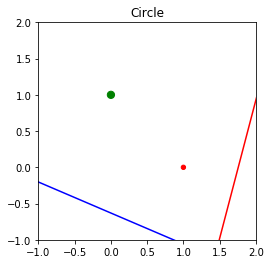

Layer ---------------
[0.945061475049241, -0.24752901692285995] 1.660114021976032 0 : [0.0, 1.0] 0.13093186317651154
[0.486594082057332, 1.1370859298919163] -0.717324454522995 1 : [0.0, 1.0] 0.8627302342113483
0 activate     [0.945061475049241, -0.24752901692285995] 1.660114021976032 : [1.0, 0.0] ==> -0.715052546926791
0 transfer     -0.715052546926791 ==> 0.3284833747614417
1 activate     [0.486594082057332, 1.1370859298919163] -0.717324454522995 : [1.0, 0.0] ==> 1.203918536580327
1 transfer     1.203918536580327 ==> 0.7692211357623985
0 activate     [0.945061475049241, -0.24752901692285995] 1.660114021976032 : [0.0, 1.0] ==> -1.9076430388988919
0 transfer     -1.9076430388988919 ==> 0.12924587608555188
1 activate     [0.486594082057332, 1.1370859298919163] -0.717324454522995 : [0.0, 1.0] ==> 1.8544103844149111
1 transfer     1.8544103844149111 ==> 0.8646441015258461
>epoch=43, lrate=0.500, error=1.078


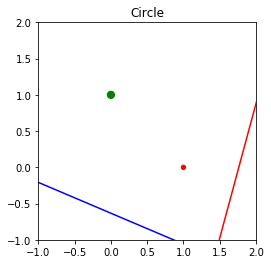

Layer ---------------
[0.945061475049241, -0.25480177152402705] 1.667386776577199 0 : [0.0, 1.0] 0.12924587608555188
[0.486594082057332, 1.145006596971308] -0.7252451216023867 1 : [0.0, 1.0] 0.8646441015258461
0 activate     [0.945061475049241, -0.25480177152402705] 1.667386776577199 : [1.0, 0.0] ==> -0.722325301527958
0 transfer     -0.722325301527958 ==> 0.3268811413477572
1 activate     [0.486594082057332, 1.145006596971308] -0.7252451216023867 : [1.0, 0.0] ==> 1.2118392036597188
1 transfer     1.2118392036597188 ==> 0.7706242131513505
0 activate     [0.945061475049241, -0.25480177152402705] 1.667386776577199 : [0.0, 1.0] ==> -1.922188548101226
0 transfer     -1.922188548101226 ==> 0.1276177134864522
1 activate     [0.486594082057332, 1.145006596971308] -0.7252451216023867 : [0.0, 1.0] ==> 1.8702517185736947
1 transfer     1.8702517185736947 ==> 0.8664874007161911
>epoch=44, lrate=0.500, error=1.081


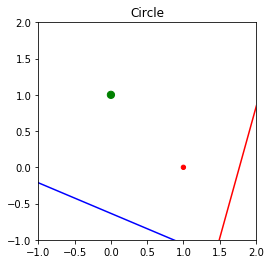

Layer ---------------
[0.945061475049241, -0.2619057029636215] 1.6744907080167934 0 : [0.0, 1.0] 0.1276177134864522
[0.486594082057332, 1.1527294320143995] -0.7329679566454783 1 : [0.0, 1.0] 0.8664874007161911
0 activate     [0.945061475049241, -0.2619057029636215] 1.6744907080167934 : [1.0, 0.0] ==> -0.7294292329675525
0 transfer     -0.7294292329675525 ==> 0.325319990808698
1 activate     [0.486594082057332, 1.1527294320143995] -0.7329679566454783 : [1.0, 0.0] ==> 1.2195620387028103
1 transfer     1.2195620387028103 ==> 0.7719864671902061
0 activate     [0.945061475049241, -0.2619057029636215] 1.6744907080167934 : [0.0, 1.0] ==> -1.9363964109804148
0 transfer     -1.9363964109804148 ==> 0.1260442828629578
1 activate     [0.486594082057332, 1.1527294320143995] -0.7329679566454783 : [0.0, 1.0] ==> 1.8856973886598778
1 transfer     1.8856973886598778 ==> 0.8682641707365879
>epoch=45, lrate=0.500, error=1.084


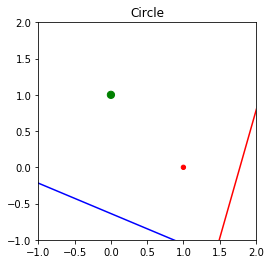

Layer ---------------
[0.945061475049241, -0.2688480406620745] 1.6814330457152464 0 : [0.0, 1.0] 0.1260442828629578
[0.486594082057332, 1.160263502928185] -0.7405020275592636 1 : [0.0, 1.0] 0.8682641707365879
0 activate     [0.945061475049241, -0.2688480406620745] 1.6814330457152464 : [1.0, 0.0] ==> -0.7363715706660054
0 transfer     -0.7363715706660054 ==> 0.32379809036973717
1 activate     [0.486594082057332, 1.160263502928185] -0.7405020275592636 : [1.0, 0.0] ==> 1.2270961096165958
1 transfer     1.2270961096165958 ==> 0.7733099214427261
0 activate     [0.945061475049241, -0.2688480406620745] 1.6814330457152464 : [0.0, 1.0] ==> -1.950281086377321
0 transfer     -1.950281086377321 ==> 0.12452271181407087
1 activate     [0.486594082057332, 1.160263502928185] -0.7405020275592636 : [0.0, 1.0] ==> 1.9007655304874485
1 transfer     1.9007655304874485 ==> 0.8699781440446653
>epoch=46, lrate=0.500, error=1.088


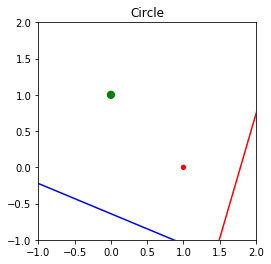

Layer ---------------
[0.945061475049241, -0.27563557482380907] 1.688220579876981 0 : [0.0, 1.0] 0.12452271181407087
[0.486594082057332, 1.1676172902995987] -0.7478558149306774 1 : [0.0, 1.0] 0.8699781440446653
0 activate     [0.945061475049241, -0.27563557482380907] 1.688220579876981 : [1.0, 0.0] ==> -0.74315910482774
0 transfer     -0.74315910482774 ==> 0.32231372113862744
1 activate     [0.486594082057332, 1.1676172902995987] -0.7478558149306774 : [1.0, 0.0] ==> 1.2344498969880093
1 transfer     1.2344498969880093 ==> 0.7745964612070653
0 activate     [0.945061475049241, -0.27563557482380907] 1.688220579876981 : [0.0, 1.0] ==> -1.96385615470079
0 transfer     -1.96385615470079 ==> 0.12305032876216883
1 activate     [0.486594082057332, 1.1676172902995987] -0.7478558149306774 : [0.0, 1.0] ==> 1.915473105230276
1 transfer     1.915473105230276 ==> 0.8716327751422469
>epoch=47, lrate=0.500, error=1.091


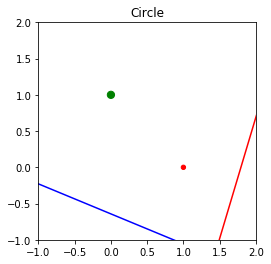

Layer ---------------
[0.945061475049241, -0.28227469042488434] 1.6948596954780561 0 : [0.0, 1.0] 0.12305032876216883
[0.486594082057332, 1.1747987356735876] -0.7550372603046664 1 : [0.0, 1.0] 0.8716327751422469
0 activate     [0.945061475049241, -0.28227469042488434] 1.6948596954780561 : [1.0, 0.0] ==> -0.7497982204288152
0 transfer     -0.7497982204288152 ==> 0.3208652691725205
1 activate     [0.486594082057332, 1.1747987356735876] -0.7550372603046664 : [1.0, 0.0] ==> 1.2416313423619985
1 transfer     1.2416313423619985 ==> 0.7758478453631306
0 activate     [0.945061475049241, -0.28227469042488434] 1.6948596954780561 : [0.0, 1.0] ==> -1.9771343859029404
0 transfer     -1.9771343859029404 ==> 0.12162464564853935
1 activate     [0.486594082057332, 1.1747987356735876] -0.7550372603046664 : [0.0, 1.0] ==> 1.929835995978254
1 transfer     1.929835995978254 ==> 0.8732312660027027
>epoch=48, lrate=0.500, error=1.094


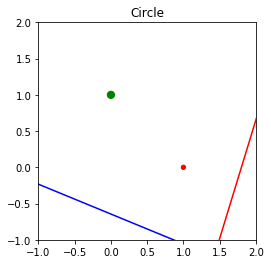

Layer ---------------
[0.945061475049241, -0.2887713980441107] 1.7013564030972825 0 : [0.0, 1.0] 0.12162464564853935
[0.486594082057332, 1.181815285084752] -0.7620538097158309 1 : [0.0, 1.0] 0.8732312660027027
0 activate     [0.945061475049241, -0.2887713980441107] 1.7013564030972825 : [1.0, 0.0] ==> -0.7562949280480415
0 transfer     -0.7562949280480415 ==> 0.31945121738153537
1 activate     [0.486594082057332, 1.181815285084752] -0.7620538097158309 : [1.0, 0.0] ==> 1.248647891773163
1 transfer     1.248647891773163 ==> 0.7770657170138888
0 activate     [0.945061475049241, -0.2887713980441107] 1.7013564030972825 : [0.0, 1.0] ==> -1.9901278011413932
0 transfer     -1.9901278011413932 ==> 0.12024334238306103
1 activate     [0.486594082057332, 1.181815285084752] -0.7620538097158309 : [0.0, 1.0] ==> 1.943869094800583
1 transfer     1.943869094800583 ==> 0.8747765887705328
>epoch=49, lrate=0.500, error=1.097


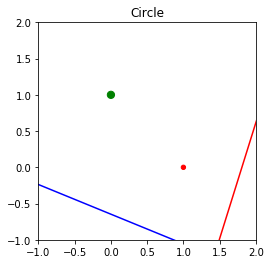

Layer ---------------
[0.945061475049241, -0.295131361876364] 1.7077163669295359 0 : [0.0, 1.0] 0.12024334238306103
[0.486594082057332, 1.1886739283798498] -0.7689124530109286 1 : [0.0, 1.0] 0.8747765887705328
0 activate     [0.945061475049241, -0.295131361876364] 1.7077163669295359 : [1.0, 0.0] ==> -0.7626548918802949
0 transfer     -0.7626548918802949 ==> 0.31807013817861735
1 activate     [0.486594082057332, 1.1886739283798498] -0.7689124530109286 : [1.0, 0.0] ==> 1.2555065350682606
1 transfer     1.2555065350682606 ==> 0.7782516130614346
0 activate     [0.945061475049241, -0.295131361876364] 1.7077163669295359 : [0.0, 1.0] ==> -2.0028477288059
0 transfer     -2.0028477288059 ==> 0.11890425284525762
1 activate     [0.486594082057332, 1.1886739283798498] -0.7689124530109286 : [0.0, 1.0] ==> 1.9575863813907783
1 transfer     1.9575863813907783 ==> 0.8762715060657993
>epoch=50, lrate=0.500, error=1.100


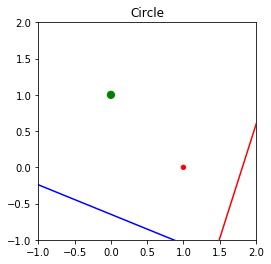

Layer ---------------
[0.945061475049241, -0.3013599252259329] 1.7139449302791048 0 : [0.0, 1.0] 0.11890425284525762
[0.486594082057332, 1.1953812348002801] -0.775619759431359 1 : [0.0, 1.0] 0.8762715060657993
0 activate     [0.945061475049241, -0.3013599252259329] 1.7139449302791048 : [1.0, 0.0] ==> -0.7688834552298638
0 transfer     -0.7688834552298638 ==> 0.3167206867964269
1 activate     [0.486594082057332, 1.1953812348002801] -0.775619759431359 : [1.0, 0.0] ==> 1.262213841488691
1 transfer     1.262213841488691 ==> 0.7794069728402421
0 activate     [0.945061475049241, -0.3013599252259329] 1.7139449302791048 : [0.0, 1.0] ==> -2.015304855505038
0 transfer     -2.015304855505038 ==> 0.11760535226008878
1 activate     [0.486594082057332, 1.1953812348002801] -0.775619759431359 : [0.0, 1.0] ==> 1.971000994231639
1 transfer     1.971000994231639 ==> 0.8777185891809671
>epoch=51, lrate=0.500, error=1.103


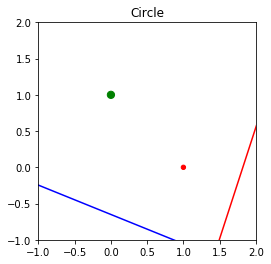

Layer ---------------
[0.945061475049241, -0.3074621337422806] 1.7200471387954526 0 : [0.0, 1.0] 0.11760535226008878
[0.486594082057332, 1.2019433852349932] -0.7821819098660721 1 : [0.0, 1.0] 0.8777185891809671
0 activate     [0.945061475049241, -0.3074621337422806] 1.7200471387954526 : [1.0, 0.0] ==> -0.7749856637462116
0 transfer     -0.7749856637462116 ==> 0.3154015952014533
1 activate     [0.486594082057332, 1.2019433852349932] -0.7821819098660721 : [1.0, 0.0] ==> 1.268775991923404
1 transfer     1.268775991923404 ==> 0.7805331459142694
0 activate     [0.945061475049241, -0.3074621337422806] 1.7200471387954526 : [0.0, 1.0] ==> -2.027509272537733
0 transfer     -2.027509272537733 ==> 0.11634474579428339
1 activate     [0.486594082057332, 1.2019433852349932] -0.7821819098660721 : [0.0, 1.0] ==> 1.9841252951010653
1 transfer     1.9841252951010653 ==> 0.8791202344192982
>epoch=52, lrate=0.500, error=1.106


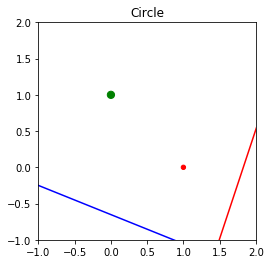

Layer ---------------
[0.945061475049241, -0.31344275662980925] 1.726027761682981 0 : [0.0, 1.0] 0.11634474579428339
[0.486594082057332, 1.2083662015036631] -0.788604726134742 1 : [0.0, 1.0] 0.8791202344192982
0 activate     [0.945061475049241, -0.31344275662980925] 1.726027761682981 : [1.0, 0.0] ==> -0.7809662866337401
0 transfer     -0.7809662866337401 ==> 0.31411166654375605
1 activate     [0.486594082057332, 1.2083662015036631] -0.788604726134742 : [1.0, 0.0] ==> 1.275198808192074
1 transfer     1.275198808192074 ==> 0.7816313991310612
0 activate     [0.945061475049241, -0.31344275662980925] 1.726027761682981 : [0.0, 1.0] ==> -2.0394705183127906
0 transfer     -2.0394705183127906 ==> 0.11512065823833606
1 activate     [0.486594082057332, 1.2083662015036631] -0.788604726134742 : [0.0, 1.0] ==> 1.9969709276384051
1 transfer     1.9969709276384051 ==> 0.8804786777911571
>epoch=53, lrate=0.500, error=1.109


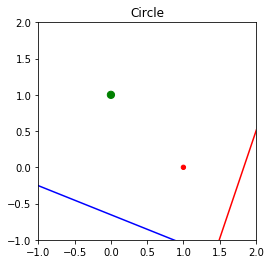

Layer ---------------
[0.945061475049241, -0.319306306036416] 1.731891311089588 0 : [0.0, 1.0] 0.11512065823833606
[0.486594082057332, 1.2146551729862305] -0.7948936976173093 1 : [0.0, 1.0] 0.8804786777911571
0 activate     [0.945061475049241, -0.319306306036416] 1.731891311089588 : [1.0, 0.0] ==> -0.786829836040347
0 transfer     -0.786829836040347 ==> 0.31284977008788456
1 activate     [0.486594082057332, 1.2146551729862305] -0.7948936976173093 : [1.0, 0.0] ==> 1.2814877796746413
1 transfer     1.2814877796746413 ==> 0.7827029230143502
0 activate     [0.945061475049241, -0.319306306036416] 1.731891311089588 : [0.0, 1.0] ==> -2.051197617126004
0 transfer     -2.051197617126004 ==> 0.1139314246559467
1 activate     [0.486594082057332, 1.2146551729862305] -0.7948936976173093 : [0.0, 1.0] ==> 2.00954887060354
1 transfer     2.00954887060354 ==> 0.881796008256509
>epoch=54, lrate=0.500, error=1.112


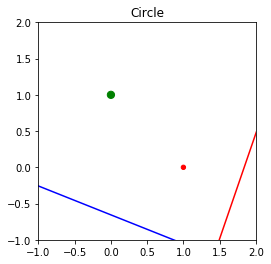

Layer ---------------
[0.945061475049241, -0.32505705480226027] 1.737642059855432 0 : [0.0, 1.0] 0.1139314246559467
[0.486594082057332, 1.2208154808770435] -0.8010540055081223 1 : [0.0, 1.0] 0.881796008256509
0 activate     [0.945061475049241, -0.32505705480226027] 1.737642059855432 : [1.0, 0.0] ==> -0.7925805848061911
0 transfer     -0.7925805848061911 ==> 0.31161483657675854
1 activate     [0.486594082057332, 1.2208154808770435] -0.8010540055081223 : [1.0, 0.0] ==> 1.2876480875654543
1 transfer     1.2876480875654543 ==> 0.7837488375666244
0 activate     [0.945061475049241, -0.32505705480226027] 1.737642059855432 : [0.0, 1.0] ==> -2.0626991146576925
0 transfer     -2.0626991146576925 ==> 0.11277548189707956
1 activate     [0.486594082057332, 1.2208154808770435] -0.8010540055081223 : [0.0, 1.0] ==> 2.0218694863851656
1 transfer     2.0218694863851656 ==> 0.8830741796778112
>epoch=55, lrate=0.500, error=1.115


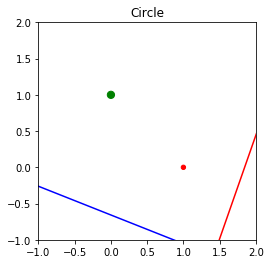

Layer ---------------
[0.945061475049241, -0.3306990527297424] 1.7432840577829143 0 : [0.0, 1.0] 0.11277548189707956
[0.486594082057332, 1.2268520203089597] -0.8070905449400385 1 : [0.0, 1.0] 0.8830741796778112
0 activate     [0.945061475049241, -0.3306990527297424] 1.7432840577829143 : [1.0, 0.0] ==> -0.7982225827336733
0 transfer     -0.7982225827336733 ==> 0.3104058539857339
1 activate     [0.486594082057332, 1.2268520203089597] -0.8070905449400385 : [1.0, 0.0] ==> 1.2936846269973705
1 transfer     1.2936846269973705 ==> 0.784770197544448
0 activate     [0.945061475049241, -0.3306990527297424] 1.7432840577829143 : [0.0, 1.0] ==> -2.073983110512657
0 transfer     -2.073983110512657 ==> 0.11165136088329057
1 activate     [0.486594082057332, 1.2268520203089597] -0.8070905449400385 : [0.0, 1.0] ==> 2.0339425652489984
1 transfer     2.0339425652489984 ==> 0.884315021626796
>epoch=56, lrate=0.500, error=1.117


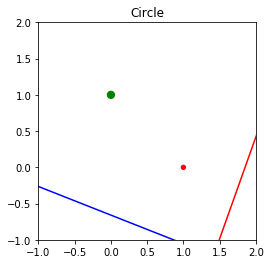

Layer ---------------
[0.945061475049241, -0.336236141517825] 1.7488211465709969 0 : [0.0, 1.0] 0.11165136088329057
[0.486594082057332, 1.2327694205641897] -0.8130079451952684 1 : [0.0, 1.0] 0.884315021626796
0 activate     [0.945061475049241, -0.336236141517825] 1.7488211465709969 : [1.0, 0.0] ==> -0.8037596715217559
0 transfer     -0.8037596715217559 ==> 0.3092218636288446
1 activate     [0.486594082057332, 1.2327694205641897] -0.8130079451952684 : [1.0, 0.0] ==> 1.2996020272526003
1 transfer     1.2996020272526003 ==> 0.7857679972618118
0 activate     [0.945061475049241, -0.336236141517825] 1.7488211465709969 : [0.0, 1.0] ==> -2.085057288088822
0 transfer     -2.085057288088822 ==> 0.1105576795847906
1 activate     [0.486594082057332, 1.2327694205641897] -0.8130079451952684 : [0.0, 1.0] ==> 2.045777365759458
1 transfer     2.045777365759458 ==> 0.8855202491707986
>epoch=57, lrate=0.500, error=1.120


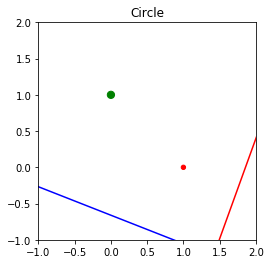

Layer ---------------
[0.945061475049241, -0.34167196848815096] 1.754256973541323 0 : [0.0, 1.0] 0.1105576795847906
[0.486594082057332, 1.2385720635637667] -0.8188105881948453 1 : [0.0, 1.0] 0.8855202491707986
0 activate     [0.945061475049241, -0.34167196848815096] 1.754256973541323 : [1.0, 0.0] ==> -0.8091954984920819
0 transfer     -0.8091954984920819 ==> 0.3080619565833893
1 activate     [0.486594082057332, 1.2385720635637667] -0.8188105881948453 : [1.0, 0.0] ==> 1.3054046702521773
1 transfer     1.3054046702521773 ==> 0.7867431749702651
0 activate     [0.945061475049241, -0.34167196848815096] 1.754256973541323 : [0.0, 1.0] ==> -2.0959289420294738
0 transfer     -2.0959289420294738 ==> 0.10949313661812582
1 activate     [0.486594082057332, 1.2385720635637667] -0.8188105881948453 : [0.0, 1.0] ==> 2.057382651758612
1 transfer     2.057382651758612 ==> 0.8866914717488907
>epoch=58, lrate=0.500, error=1.123


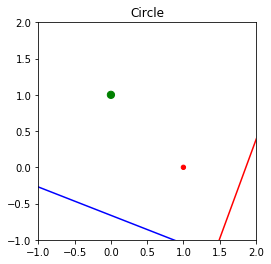

Layer ---------------
[0.945061475049241, -0.3470099992166485] 1.7595950042698205 0 : [0.0, 1.0] 0.10949313661812582
[0.486594082057332, 1.24426410080579] -0.8245026254368685 1 : [0.0, 1.0] 0.8866914717488907
0 activate     [0.945061475049241, -0.3470099992166485] 1.7595950042698205 : [1.0, 0.0] ==> -0.8145335292205795
0 transfer     -0.8145335292205795 ==> 0.3069252704026994
1 activate     [0.486594082057332, 1.24426410080579] -0.8245026254368685 : [1.0, 0.0] ==> 1.3110967074942006
1 transfer     1.3110967074942006 ==> 0.7876966168589102
0 activate     [0.945061475049241, -0.3470099992166485] 1.7595950042698205 : [0.0, 1.0] ==> -2.106605003486469
0 transfer     -2.106605003486469 ==> 0.10845650540155234
1 activate     [0.486594082057332, 1.24426410080579] -0.8245026254368685 : [0.0, 1.0] ==> 2.0687667262426586
1 transfer     2.0687667262426586 ==> 0.887830201234735
>epoch=59, lrate=0.500, error=1.125


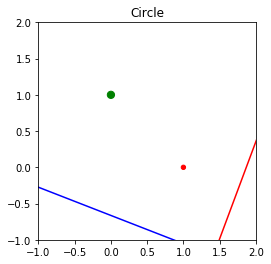

Layer ---------------
[0.945061475049241, -0.35225352917219077] 1.7648385342253627 0 : [0.0, 1.0] 0.10845650540155234
[0.486594082057332, 1.2498494689035826] -0.8300879935346612 1 : [0.0, 1.0] 0.887830201234735
0 activate     [0.945061475049241, -0.35225352917219077] 1.7648385342253627 : [1.0, 0.0] ==> -0.8197770591761218
0 transfer     -0.8197770591761218 ==> 0.30581098609015406
1 activate     [0.486594082057332, 1.2498494689035826] -0.8300879935346612 : [1.0, 0.0] ==> 1.3166820755919932
1 transfer     1.3166820755919932 ==> 0.7886291607123996
0 activate     [0.945061475049241, -0.35225352917219077] 1.7648385342253627 : [0.0, 1.0] ==> -2.1170920633975534
0 transfer     -2.1170920633975534 ==> 0.10744662881234111
1 activate     [0.486594082057332, 1.2498494689035826] -0.8300879935346612 : [0.0, 1.0] ==> 2.079937462438244
1 transfer     2.079937462438244 ==> 0.8889378592715426
>epoch=60, lrate=0.500, error=1.128


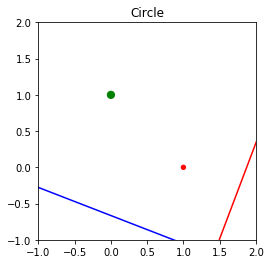

Layer ---------------
[0.945061475049241, -0.35740569445319836] 1.7699906995063703 0 : [0.0, 1.0] 0.10744662881234111
[0.486594082057332, 1.2553319038582487] -0.8355704284893273 1 : [0.0, 1.0] 0.8889378592715426
0 activate     [0.945061475049241, -0.35740569445319836] 1.7699906995063703 : [1.0, 0.0] ==> -0.8249292244571294
0 transfer     -0.8249292244571294 ==> 0.3047183253103545
1 activate     [0.486594082057332, 1.2553319038582487] -0.8355704284893273 : [1.0, 0.0] ==> 1.3221645105466593
1 transfer     1.3221645105466593 ==> 0.789541599260759
0 activate     [0.945061475049241, -0.35740569445319836] 1.7699906995063703 : [0.0, 1.0] ==> -2.1273963939595686
0 transfer     -2.1273963939595686 ==> 0.10646241429650682
1 activate     [0.486594082057332, 1.2553319038582487] -0.8355704284893273 : [0.0, 1.0] ==> 2.090902332347576
1 transfer     2.090902332347576 ==> 0.8900157839544538
>epoch=61, lrate=0.500, error=1.130


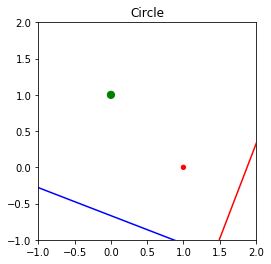

Layer ---------------
[0.945061475049241, -0.3624694817036372] 1.7750544867568092 0 : [0.0, 1.0] 0.10646241429650682
[0.486594082057332, 1.2607149541854936] -0.8409534788165723 1 : [0.0, 1.0] 0.8900157839544538
0 activate     [0.945061475049241, -0.3624694817036372] 1.7750544867568092 : [1.0, 0.0] ==> -0.8299930117075682
0 transfer     -0.8299930117075682 ==> 0.30364654781588046
1 activate     [0.486594082057332, 1.2607149541854936] -0.8409534788165723 : [1.0, 0.0] ==> 1.3275475608739042
1 transfer     1.3275475608739042 ==> 0.7904346832510856
0 activate     [0.945061475049241, -0.3624694817036372] 1.7750544867568092 : [0.0, 1.0] ==> -2.1375239684604463
0 transfer     -2.1375239684604463 ==> 0.10550282938693874
1 activate     [0.486594082057332, 1.2607149541854936] -0.8409534788165723 : [0.0, 1.0] ==> 2.101668433002066
1 transfer     2.101668433002066 ==> 0.8910652359269408
>epoch=62, lrate=0.500, error=1.133


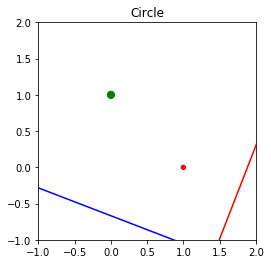

Layer ---------------
[0.945061475049241, -0.3674477372815191] 1.780032742334691 0 : [0.0, 1.0] 0.10550282938693874
[0.486594082057332, 1.2660019930037196] -0.8462405176347985 1 : [0.0, 1.0] 0.8910652359269408
0 activate     [0.945061475049241, -0.3674477372815191] 1.780032742334691 : [1.0, 0.0] ==> -0.8349712672854501
0 transfer     -0.8349712672854501 ==> 0.30259494907027407
1 activate     [0.486594082057332, 1.2660019930037196] -0.8462405176347985 : [1.0, 0.0] ==> 1.3328345996921305
1 transfer     1.3328345996921305 ==> 0.7913091242678634
0 activate     [0.945061475049241, -0.3674477372815191] 1.780032742334691 : [0.0, 1.0] ==> -2.14748047961621
0 transfer     -2.14748047961621 ==> 0.10456689759072399
1 activate     [0.486594082057332, 1.2660019930037196] -0.8462405176347985 : [0.0, 1.0] ==> 2.1122425106385183
1 transfer     2.1122425106385183 ==> 0.8920874039501985
>epoch=63, lrate=0.500, error=1.135


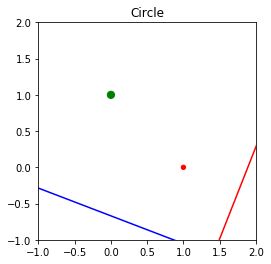

Layer ---------------
[0.945061475049241, -0.37234317574561987] 1.784928180798792 0 : [0.0, 1.0] 0.10456689759072399
[0.486594082057332, 1.271196229179079] -0.8514347538101579 1 : [0.0, 1.0] 0.8920874039501985
0 activate     [0.945061475049241, -0.37234317574561987] 1.784928180798792 : [1.0, 0.0] ==> -0.839866705749551
0 transfer     -0.839866705749551 ==> 0.3015628580498627
1 activate     [0.486594082057332, 1.271196229179079] -0.8514347538101579 : [1.0, 0.0] ==> 1.3380288358674899
1 transfer     1.3380288358674899 ==> 0.7921655973257321
0 activate     [0.945061475049241, -0.37234317574561987] 1.784928180798792 : [0.0, 1.0] ==> -2.157271356544412
0 transfer     -2.157271356544412 ==> 0.10365369461068563
1 activate     [0.486594082057332, 1.271196229179079] -0.8514347538101579 : [0.0, 1.0] ==> 2.1226309829892367
1 transfer     2.1226309829892367 ==> 0.8930834099978358
>epoch=64, lrate=0.500, error=1.138


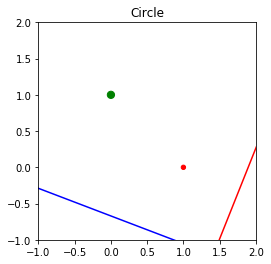

Layer ---------------
[0.945061475049241, -0.37715838771956656] 1.7897433927727386 0 : [0.0, 1.0] 0.10365369461068563
[0.486594082057332, 1.2763007176131773] -0.8565392422442563 1 : [0.0, 1.0] 0.8930834099978358
0 activate     [0.945061475049241, -0.37715838771956656] 1.7897433927727386 : [1.0, 0.0] ==> -0.8446819177234977
0 transfer     -0.8446819177234977 ==> 0.3005496352087801
1 activate     [0.486594082057332, 1.2763007176131773] -0.8565392422442563 : [1.0, 0.0] ==> 1.3431333243015882
1 transfer     1.3431333243015882 ==> 0.7930047432559926
0 activate     [0.945061475049241, -0.37715838771956656] 1.7897433927727386 : [0.0, 1.0] ==> -2.166901780492305
0 transfer     -2.166901780492305 ==> 0.10276234486988459
1 activate     [0.486594082057332, 1.2763007176131773] -0.8565392422442563 : [0.0, 1.0] ==> 2.1328399598574337
1 transfer     2.1328399598574337 ==> 0.8940543139223496
>epoch=65, lrate=0.500, error=1.140


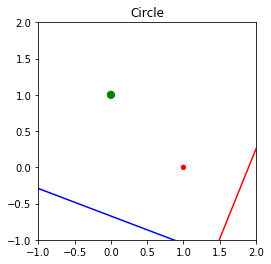

Layer ---------------
[0.945061475049241, -0.3818958471866156] 1.7944808522397877 0 : [0.0, 1.0] 0.10276234486988459
[0.486594082057332, 1.2813183687502865] -0.8615568933813653 1 : [0.0, 1.0] 0.8940543139223496
0 activate     [0.945061475049241, -0.3818958471866156] 1.7944808522397877 : [1.0, 0.0] ==> -0.8494193771905467
0 transfer     -0.8494193771905467 ==> 0.2995546705930914
1 activate     [0.486594082057332, 1.2813183687502865] -0.8615568933813653 : [1.0, 0.0] ==> 1.3481509754386973
1 transfer     1.3481509754386973 ==> 0.7938271709058778
0 activate     [0.945061475049241, -0.3818958471866156] 1.7944808522397877 : [0.0, 1.0] ==> -2.1763766994264033
0 transfer     -2.1763766994264033 ==> 0.10189201831112188
1 activate     [0.486594082057332, 1.2813183687502865] -0.8615568933813653 : [0.0, 1.0] ==> 2.1428752621316516
1 transfer     2.1428752621316516 ==> 0.8950011177347444
>epoch=66, lrate=0.500, error=1.142


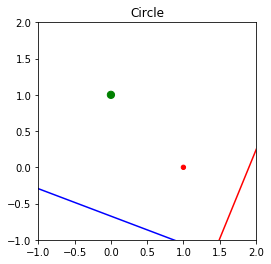

Layer ---------------
[0.945061475049241, -0.38655791826325187] 1.799142923316424 0 : [0.0, 1.0] 0.10189201831112188
[0.486594082057332, 1.2862519573731046] -0.8664904820041834 1 : [0.0, 1.0] 0.8950011177347444
0 activate     [0.945061475049241, -0.38655791826325187] 1.799142923316424 : [1.0, 0.0] ==> -0.854081448267183
0 transfer     -0.854081448267183 ==> 0.29857738209131246
1 activate     [0.486594082057332, 1.2862519573731046] -0.8664904820041834 : [1.0, 0.0] ==> 1.3530845640615154
1 transfer     1.3530845640615154 ==> 0.7946334591676386
0 activate     [0.945061475049241, -0.38655791826325187] 1.799142923316424 : [0.0, 1.0] ==> -2.185700841579676
0 transfer     -2.185700841579676 ==> 0.10104192744638367
1 activate     [0.486594082057332, 1.2862519573731046] -0.8664904820041834 : [0.0, 1.0] ==> 2.1527424393772883
1 transfer     2.1527424393772883 ==> 0.8959247695341819
>epoch=67, lrate=0.500, error=1.144


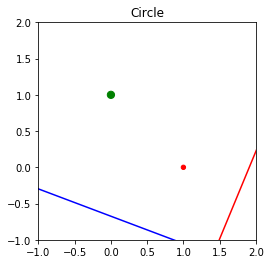

Layer ---------------
[0.945061475049241, -0.3911468614951108] 1.8037318665482829 0 : [0.0, 1.0] 0.10104192744638367
[0.486594082057332, 1.2911041307491697] -0.8713426553802485 1 : [0.0, 1.0] 0.8959247695341819
0 activate     [0.945061475049241, -0.3911468614951108] 1.8037318665482829 : [1.0, 0.0] ==> -0.8586703914990419
0 transfer     -0.8586703914990419 ==> 0.29761721380983924
1 activate     [0.486594082057332, 1.2911041307491697] -0.8713426553802485 : [1.0, 0.0] ==> 1.3579367374375804
1 transfer     1.3579367374375804 ==> 0.7954241588527285
0 activate     [0.945061475049241, -0.3911468614951108] 1.8037318665482829 : [0.0, 1.0] ==> -2.1948787280433937
0 transfer     -2.1948787280433937 ==> 0.10021132463374126
1 activate     [0.486594082057332, 1.2911041307491697] -0.8713426553802485 : [0.0, 1.0] ==> 2.162446786129418
1 transfer     2.162446786129418 ==> 0.8968261671205773
>epoch=68, lrate=0.500, error=1.147


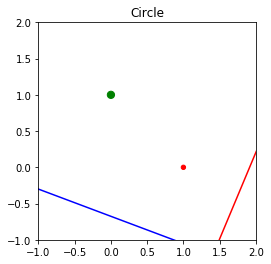

Layer ---------------
[0.945061475049241, -0.39566483971459543] 1.8082498447677675 0 : [0.0, 1.0] 0.10021132463374126
[0.486594082057332, 1.2958774161838713] -0.8761159408149499 1 : [0.0, 1.0] 0.8968261671205773
0 activate     [0.945061475049241, -0.39566483971459543] 1.8082498447677675 : [1.0, 0.0] ==> -0.8631883697185265
0 transfer     -0.8631883697185265 ==> 0.29667363456290097
1 activate     [0.486594082057332, 1.2958774161838713] -0.8761159408149499 : [1.0, 0.0] ==> 1.362710022872282
1 transfer     1.362710022872282 ==> 0.7961997944248232
0 activate     [0.945061475049241, -0.39566483971459543] 1.8082498447677675 : [0.0, 1.0] ==> -2.203914684482363
0 transfer     -2.203914684482363 ==> 0.09939949956149859
1 activate     [0.486594082057332, 1.2958774161838713] -0.8761159408149499 : [0.0, 1.0] ==> 2.1719933569988212
1 transfer     2.1719933569988212 ==> 0.8977061613195872
>epoch=69, lrate=0.500, error=1.149


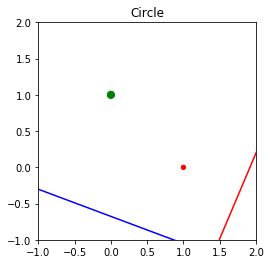

Layer ---------------
[0.945061475049241, -0.4001139234958651] 1.8126989285490371 0 : [0.0, 1.0] 0.09939949956149859
[0.486594082057332, 1.3005742280305277] -0.8808127526616063 1 : [0.0, 1.0] 0.8977061613195872
0 activate     [0.945061475049241, -0.4001139234958651] 1.8126989285490371 : [1.0, 0.0] ==> -0.8676374534997962
0 transfer     -0.8676374534997962 ==> 0.2957461364676332
1 activate     [0.486594082057332, 1.3005742280305277] -0.8808127526616063 : [1.0, 0.0] ==> 1.3674068347189383
1 transfer     1.3674068347189383 ==> 0.7969608656040279
0 activate     [0.945061475049241, -0.4001139234958651] 1.8126989285490371 : [0.0, 1.0] ==> -2.212812852044902
0 transfer     -2.212812852044902 ==> 0.09860577692140203
1 activate     [0.486594082057332, 1.3005742280305277] -0.8808127526616063 : [0.0, 1.0] ==> 2.181386980692134
1 transfer     2.181386980692134 ==> 0.8985655590463518
>epoch=70, lrate=0.500, error=1.151


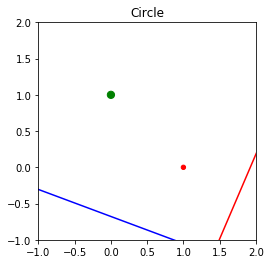

Layer ---------------
[0.945061475049241, -0.4044960962395676] 1.8170811012927397 0 : [0.0, 1.0] 0.09860577692140203
[0.486594082057332, 1.3051968742031173] -0.8854353988341959 1 : [0.0, 1.0] 0.8985655590463518
0 activate     [0.945061475049241, -0.4044960962395676] 1.8170811012927397 : [1.0, 0.0] ==> -0.8720196262434987
0 transfer     -0.8720196262434987 ==> 0.29483423363574096
1 activate     [0.486594082057332, 1.3051968742031173] -0.8854353988341959 : [1.0, 0.0] ==> 1.3720294808915279
1 transfer     1.3720294808915279 ==> 0.797707848853402
0 activate     [0.945061475049241, -0.4044960962395676] 1.8170811012927397 : [0.0, 1.0] ==> -2.2215771975323073
0 transfer     -2.2215771975323073 ==> 0.09782951425452632
1 activate     [0.486594082057332, 1.3051968742031173] -0.8854353988341959 : [0.0, 1.0] ==> 2.190632273037313
1 transfer     2.190632273037313 ==> 0.8994051261316324
>epoch=71, lrate=0.500, error=1.153


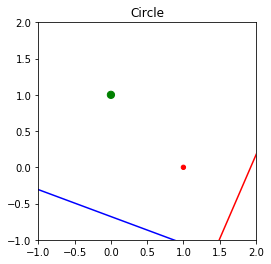

Layer ---------------
[0.945061475049241, -0.40881325891672055] 1.8213982639698927 0 : [0.0, 1.0] 0.09782951425452632
[0.486594082057332, 1.3097475622328947] -0.8899860868639734 1 : [0.0, 1.0] 0.8994051261316324
0 activate     [0.945061475049241, -0.40881325891672055] 1.8213982639698927 : [1.0, 0.0] ==> -0.8763367889206517
0 transfer     -0.8763367889206517 ==> 0.29393746095401097
1 activate     [0.486594082057332, 1.3097475622328947] -0.8899860868639734 : [1.0, 0.0] ==> 1.3765801689213055
1 transfer     1.3765801689213055 ==> 0.7984411987578395
0 activate     [0.945061475049241, -0.40881325891672055] 1.8213982639698927 : [0.0, 1.0] ==> -2.2302115228866133
0 transfer     -2.2302115228866133 ==> 0.09707009995505216
1 activate     [0.486594082057332, 1.3097475622328947] -0.8899860868639734 : [0.0, 1.0] ==> 2.199733649096868
1 transfer     2.199733649096868 ==> 0.9002255899315788
>epoch=72, lrate=0.500, error=1.155


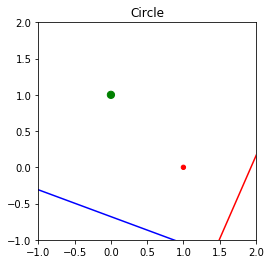

Layer ---------------
[0.945061475049241, -0.41306723449848703] 1.8256522395516592 0 : [0.0, 1.0] 0.09707009995505216
[0.486594082057332, 1.3142284049062367] -0.8944669295373154 1 : [0.0, 1.0] 0.9002255899315788
0 activate     [0.945061475049241, -0.41306723449848703] 1.8256522395516592 : [1.0, 0.0] ==> -0.8805907645024182
0 transfer     -0.8805907645024182 ==> 0.293055372946635
1 activate     [0.486594082057332, 1.3142284049062367] -0.8944669295373154 : [1.0, 0.0] ==> 1.3810610115946473
1 transfer     1.3810610115946473 ==> 0.7991613493043711
0 activate     [0.945061475049241, -0.41306723449848703] 1.8256522395516592 : [0.0, 1.0] ==> -2.2387194740501464
0 transfer     -2.2387194740501464 ==> 0.09632695141857847
1 activate     [0.486594082057332, 1.3142284049062367] -0.8944669295373154 : [0.0, 1.0] ==> 2.208695334443552
1 transfer     2.208695334443552 ==> 0.9010276417402231
>epoch=73, lrate=0.500, error=1.158


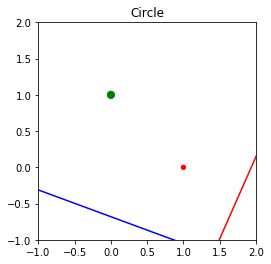

Layer ---------------
[0.945061475049241, -0.41725977209619897] 1.829844777149371 0 : [0.0, 1.0] 0.09632695141857847
[0.486594082057332, 1.3186414255175782] -0.898879950148657 1 : [0.0, 1.0] 0.9010276417402231
0 activate     [0.945061475049241, -0.41725977209619897] 1.829844777149371 : [1.0, 0.0] ==> -0.8847833021001301
0 transfer     -0.8847833021001301 ==> 0.29218754271294195
1 activate     [0.486594082057332, 1.3186414255175782] -0.898879950148657 : [1.0, 0.0] ==> 1.3854740322059889
1 transfer     1.3854740322059889 ==> 0.7998687150720912
0 activate     [0.945061475049241, -0.41725977209619897] 1.829844777149371 : [0.0, 1.0] ==> -2.24710454924557
0 transfer     -2.24710454924557 ==> 0.09559951332288821
1 activate     [0.486594082057332, 1.3186414255175782] -0.898879950148657 : [0.0, 1.0] ==> 2.217521375666235
1 transfer     2.217521375666235 ==> 0.901811939021893
>epoch=74, lrate=0.500, error=1.160


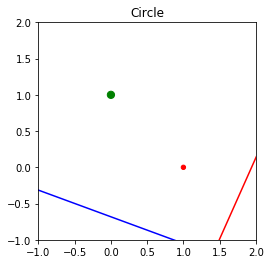

Layer ---------------
[0.945061475049241, -0.42139255083382754] 1.8339775558869997 0 : [0.0, 1.0] 0.09559951332288821
[0.486594082057332, 1.3229885627681834] -0.903227087399262 1 : [0.0, 1.0] 0.901811939021893
0 activate     [0.945061475049241, -0.42139255083382754] 1.8339775558869997 : [1.0, 0.0] ==> -0.8889160808377587
0 transfer     -0.8889160808377587 ==> 0.2913335609347052
1 activate     [0.486594082057332, 1.3229885627681834] -0.903227087399262 : [1.0, 0.0] ==> 1.389821169456594
1 transfer     1.389821169456594 ==> 0.8005636923391356
0 activate     [0.945061475049241, -0.42139255083382754] 1.8339775558869997 : [0.0, 1.0] ==> -2.2553701067208274
0 transfer     -2.2553701067208274 ==> 0.09488725603022533
1 activate     [0.486594082057332, 1.3229885627681834] -0.903227087399262 : [0.0, 1.0] ==> 2.2262156501674455
1 transfer     2.2262156501674455 ==> 0.9025791074790518
>epoch=75, lrate=0.500, error=1.162


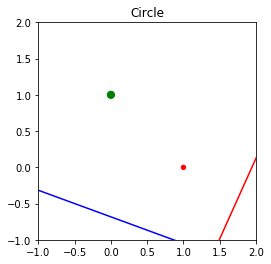

Layer ---------------
[0.945061475049241, -0.4254671834731613] 1.8380521885263335 0 : [0.0, 1.0] 0.09488725603022533
[0.486594082057332, 1.3272716753386977] -0.9075101999697762 1 : [0.0, 1.0] 0.9025791074790518
0 activate     [0.945061475049241, -0.4254671834731613] 1.8380521885263335 : [1.0, 0.0] ==> -0.8929907134770925
0 transfer     -0.8929907134770925 ==> 0.2904930349477047
1 activate     [0.486594082057332, 1.3272716753386977] -0.9075101999697762 : [1.0, 0.0] ==> 1.3941042820271083
1 transfer     1.3941042820271083 ==> 0.8012466601134406
0 activate     [0.945061475049241, -0.4254671834731613] 1.8380521885263335 : [0.0, 1.0] ==> -2.263519371999495
0 transfer     -2.263519371999495 ==> 0.09418967410116261
1 activate     [0.486594082057332, 1.3272716753386977] -0.9075101999697762 : [0.0, 1.0] ==> 2.234781875308474
1 transfer     2.234781875308474 ==> 0.9033297429695651
>epoch=76, lrate=0.500, error=1.164


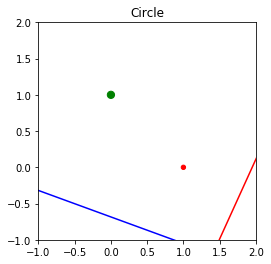

Layer ---------------
[0.945061475049241, -0.42948521981020094] 1.8420702248633731 0 : [0.0, 1.0] 0.09418967410116261
[0.486594082057332, 1.3314925461609135] -0.9117310707919919 1 : [0.0, 1.0] 0.9033297429695651
0 activate     [0.945061475049241, -0.42948521981020094] 1.8420702248633731 : [1.0, 0.0] ==> -0.8970087498141321
0 transfer     -0.8970087498141321 ==> 0.2896655878726875
1 activate     [0.486594082057332, 1.3314925461609135] -0.9117310707919919 : [1.0, 0.0] ==> 1.398325152849324
1 transfer     1.398325152849324 ==> 0.8019179810934018
0 activate     [0.945061475049241, -0.42948521981020094] 1.8420702248633731 : [0.0, 1.0] ==> -2.271555444673574
0 transfer     -2.271555444673574 ==> 0.09350628491105328
1 activate     [0.486594082057332, 1.3314925461609135] -0.9117310707919919 : [0.0, 1.0] ==> 2.243223616952905
1 transfer     2.243223616952905 ==> 0.9040644132860511
>epoch=77, lrate=0.500, error=1.166


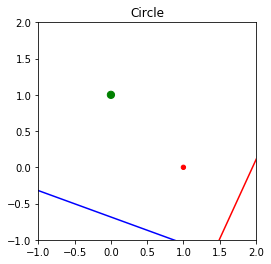

Layer ---------------
[0.945061475049241, -0.433448149859699] 1.8460331549128712 0 : [0.0, 1.0] 0.09350628491105328
[0.486594082057332, 1.335652886411922] -0.9158914110430004 1 : [0.0, 1.0] 0.9040644132860511
0 activate     [0.945061475049241, -0.433448149859699] 1.8460331549128712 : [1.0, 0.0] ==> -0.9009716798636302
0 transfer     -0.9009716798636302 ==> 0.28885085780128766
1 activate     [0.486594082057332, 1.335652886411922] -0.9158914110430004 : [1.0, 0.0] ==> 1.4024854931003325
1 transfer     1.4024854931003325 ==> 0.8025780025639828
0 activate     [0.945061475049241, -0.433448149859699] 1.8460331549128712 : [0.0, 1.0] ==> -2.2794813047725704
0 transfer     -2.2794813047725704 ==> 0.0928366273608823
1 activate     [0.486594082057332, 1.335652886411922] -0.9158914110430004 : [0.0, 1.0] ==> 2.2515442974549225
1 transfer     2.2515442974549225 ==> 0.9047836598087677
>epoch=78, lrate=0.500, error=1.168


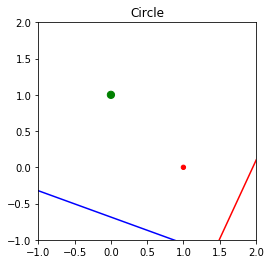

Layer ---------------
[0.945061475049241, -0.4373574068433431] 1.8499424118965153 0 : [0.0, 1.0] 0.0928366273608823
[0.486594082057332, 1.339754339251788] -0.9199928638828665 1 : [0.0, 1.0] 0.9047836598087677
0 activate     [0.945061475049241, -0.4373574068433431] 1.8499424118965153 : [1.0, 0.0] ==> -0.9048809368472743
0 transfer     -0.9048809368472743 ==> 0.2880484970328438
1 activate     [0.486594082057332, 1.339754339251788] -0.9199928638828665 : [1.0, 0.0] ==> 1.4065869459401985
1 transfer     1.4065869459401985 ==> 0.8032270572333322
0 activate     [0.945061475049241, -0.4373574068433431] 1.8499424118965153 : [0.0, 1.0] ==> -2.2872998187398585
0 transfer     -2.2872998187398585 ==> 0.0921802606750695
1 activate     [0.486594082057332, 1.339754339251788] -0.9199928638828665 : [0.0, 1.0] ==> 2.259747203134655
1 transfer     2.259747203134655 ==> 0.9054879990424212
>epoch=79, lrate=0.500, error=1.169


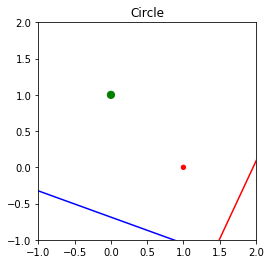

Layer ---------------
[0.945061475049241, -0.4412143699957859] 1.853799375048958 0 : [0.0, 1.0] 0.0921802606750695
[0.486594082057332, 1.3437984833240475] -0.9240370079551259 1 : [0.0, 1.0] 0.9054879990424212
0 activate     [0.945061475049241, -0.4412143699957859] 1.853799375048958 : [1.0, 0.0] ==> -0.9087378999997171
0 transfer     -0.9087378999997171 ==> 0.2872581713583946
1 activate     [0.486594082057332, 1.3437984833240475] -0.9240370079551259 : [1.0, 0.0] ==> 1.410631090012458
1 transfer     1.410631090012458 ==> 0.8038654640145139
0 activate     [0.945061475049241, -0.4412143699957859] 1.853799375048958 : [0.0, 1.0] ==> -2.295013745044744
0 transfer     -2.295013745044744 ==> 0.09153676327944231
1 activate     [0.486594082057332, 1.3437984833240475] -0.9240370079551259 : [0.0, 1.0] ==> 2.2678354912791736
1 transfer     2.2678354912791736 ==> 0.9061779240463118
>epoch=80, lrate=0.500, error=1.171


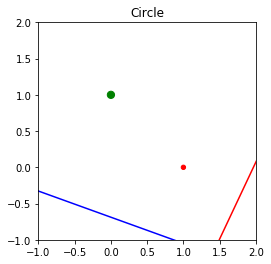

Layer ---------------
[0.945061475049241, -0.44502036720155125] 1.8576053722547234 0 : [0.0, 1.0] 0.09153676327944231
[0.486594082057332, 1.3477868360366712] -0.9280253606677495 1 : [0.0, 1.0] 0.9061779240463118
0 activate     [0.945061475049241, -0.44502036720155125] 1.8576053722547234 : [1.0, 0.0] ==> -0.9125438972054825
0 transfer     -0.9125438972054825 ==> 0.28647955938844366
1 activate     [0.486594082057332, 1.3477868360366712] -0.9280253606677495 : [1.0, 0.0] ==> 1.4146194427250816
1 transfer     1.4146194427250816 ==> 0.8044935287565494
0 activate     [0.945061475049241, -0.44502036720155125] 1.8576053722547234 : [0.0, 1.0] ==> -2.302625739456275
0 transfer     -2.302625739456275 ==> 0.09090573175319326
1 activate     [0.486594082057332, 1.3477868360366712] -0.9280253606677495 : [0.0, 1.0] ==> 2.275812196704421
1 transfer     2.275812196704421 ==> 0.9068539057663761
>epoch=81, lrate=0.500, error=1.173


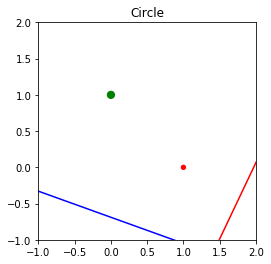

Layer ---------------
[0.945061475049241, -0.448776677474782] 1.8613616825279542 0 : [0.0, 1.0] 0.09090573175319326
[0.486594082057332, 1.35172085663964] -0.9319593812707183 1 : [0.0, 1.0] 0.9068539057663761
0 activate     [0.945061475049241, -0.448776677474782] 1.8613616825279542 : [1.0, 0.0] ==> -0.9163002074787132
0 transfer     -0.9163002074787132 ==> 0.2857123519213637
1 activate     [0.486594082057332, 1.35172085663964] -0.9319593812707183 : [1.0, 0.0] ==> 1.4185534633280503
1 transfer     1.4185534633280503 ==> 0.805111544928608
0 activate     [0.945061475049241, -0.448776677474782] 1.8613616825279542 : [0.0, 1.0] ==> -2.3101383600027363
0 transfer     -2.3101383600027363 ==> 0.09028677984917724
1 activate     [0.486594082057332, 1.35172085663964] -0.9319593812707183 : [0.0, 1.0] ==> 2.2836802379103585
1 transfer     2.2836802379103585 ==> 0.9075163942769008
>epoch=82, lrate=0.500, error=1.175


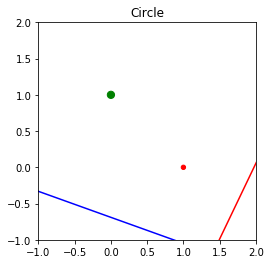

Layer ---------------
[0.945061475049241, -0.45248453329282656] 1.8650695383459988 0 : [0.0, 1.0] 0.09028677984917724
[0.486594082057332, 1.3556019491139204] -0.9358404737449988 1 : [0.0, 1.0] 0.9075163942769008
0 activate     [0.945061475049241, -0.45248453329282656] 1.8650695383459988 : [1.0, 0.0] ==> -0.9200080632967578
0 transfer     -0.9200080632967578 ==> 0.28495625134956615
1 activate     [0.486594082057332, 1.3556019491139204] -0.9358404737449988 : [1.0, 0.0] ==> 1.4224345558023308
1 transfer     1.4224345558023308 ==> 0.8057197942608462
0 activate     [0.945061475049241, -0.45248453329282656] 1.8650695383459988 : [0.0, 1.0] ==> -2.3175540716388254
0 transfer     -2.3175540716388254 ==> 0.08967953757739058
1 activate     [0.486594082057332, 1.3556019491139204] -0.9358404737449988 : [0.0, 1.0] ==> 2.2914424228589194
1 transfer     2.2914424228589194 ==> 0.9081658199389965
>epoch=83, lrate=0.500, error=1.177


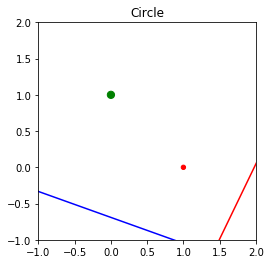

Layer ---------------
[0.945061475049241, -0.4561451227937815] 1.8687301278469537 0 : [0.0, 1.0] 0.08967953757739058
[0.486594082057332, 1.3594314648854011] -0.9396699895164796 1 : [0.0, 1.0] 0.9081658199389965
0 activate     [0.945061475049241, -0.4561451227937815] 1.8687301278469537 : [1.0, 0.0] ==> -0.9236686527977127
0 transfer     -0.9236686527977127 ==> 0.28421097110079524
1 activate     [0.486594082057332, 1.3594314648854011] -0.9396699895164796 : [1.0, 0.0] ==> 1.4262640715738115
1 transfer     1.4262640715738115 ==> 0.8063185473451062
0 activate     [0.945061475049241, -0.4561451227937815] 1.8687301278469537 : [0.0, 1.0] ==> -2.3248752506407353
0 transfer     -2.3248752506407353 ==> 0.08908365034691519
1 activate     [0.486594082057332, 1.3594314648854011] -0.9396699895164796 : [0.0, 1.0] ==> 2.299101454401881
1 transfer     2.299101454401881 ==> 0.908802594482282
>epoch=84, lrate=0.500, error=1.179


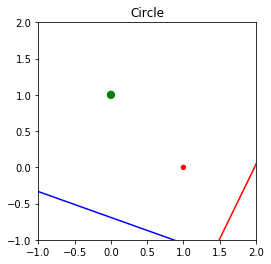

Layer ---------------
[0.945061475049241, -0.45975959184730736] 1.8723445969004795 0 : [0.0, 1.0] 0.08908365034691519
[0.486594082057332, 1.363210705376238] -0.9434492300073164 1 : [0.0, 1.0] 0.908802594482282
0 activate     [0.945061475049241, -0.45975959184730736] 1.8723445969004795 : [1.0, 0.0] ==> -0.9272831218512385
0 transfer     -0.9272831218512385 ==> 0.2834762351121131
1 activate     [0.486594082057332, 1.363210705376238] -0.9434492300073164 : [1.0, 0.0] ==> 1.4300433120646483
1 transfer     1.4300433120646483 ==> 0.8069080641984078
0 activate     [0.945061475049241, -0.45975959184730736] 1.8723445969004795 : [0.0, 1.0] ==> -2.332104188747787
0 transfer     -2.332104188747787 ==> 0.08849877816200848
1 activate     [0.486594082057332, 1.363210705376238] -0.9434492300073164 : [0.0, 1.0] ==> 2.3066599353835544
1 transfer     2.3066599353835544 ==> 0.9094271120156705
>epoch=85, lrate=0.500, error=1.181


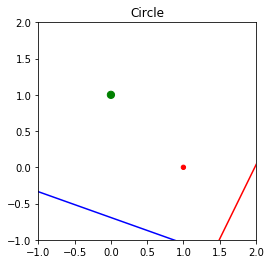

Layer ---------------
[0.945061475049241, -0.4633290460073043] 1.8759140510604764 0 : [0.0, 1.0] 0.08849877816200848
[0.486594082057332, 1.3669409244050414] -0.9471794490361198 1 : [0.0, 1.0] 0.9094271120156705
0 activate     [0.945061475049241, -0.4633290460073043] 1.8759140510604764 : [1.0, 0.0] ==> -0.9308525760112354
0 transfer     -0.9308525760112354 ==> 0.28275177733433887
1 activate     [0.486594082057332, 1.3669409244050414] -0.9471794490361198 : [1.0, 0.0] ==> 1.4337735310934518
1 transfer     1.4337735310934518 ==> 0.8074885947919226
0 activate     [0.945061475049241, -0.4633290460073043] 1.8759140510604764 : [0.0, 1.0] ==> -2.3392430970677807
0 transfer     -2.3392430970677807 ==> 0.08792459486838193
1 activate     [0.486594082057332, 1.3669409244050414] -0.9471794490361198 : [0.0, 1.0] ==> 2.3141203734411615
1 transfer     2.3141203734411615 ==> 0.9100397499726346
>epoch=86, lrate=0.500, error=1.182


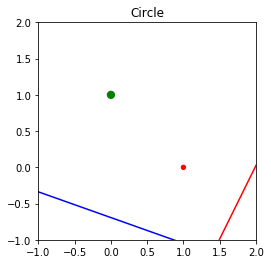

Layer ---------------
[0.945061475049241, -0.4668545523543688] 1.8794395574075409 0 : [0.0, 1.0] 0.08792459486838193
[0.486594082057332, 1.3706233304464253] -0.9508618550775036 1 : [0.0, 1.0] 0.9100397499726346
0 activate     [0.945061475049241, -0.4668545523543688] 1.8794395574075409 : [1.0, 0.0] ==> -0.9343780823582999
0 transfer     -0.9343780823582999 ==> 0.282037341264875
1 activate     [0.486594082057332, 1.3706233304464253] -0.9508618550775036 : [1.0, 0.0] ==> 1.4374559371348357
1 transfer     1.4374559371348357 ==> 0.8080603795479052
0 activate     [0.945061475049241, -0.4668545523543688] 1.8794395574075409 : [0.0, 1.0] ==> -2.3462941097619097
0 transfer     -2.3462941097619097 ==> 0.0873607874460384
1 activate     [0.486594082057332, 1.3706233304464253] -0.9508618550775036 : [0.0, 1.0] ==> 2.3214851855239287
1 transfer     2.3214851855239287 ==> 0.910640869995866
>epoch=87, lrate=0.500, error=1.184


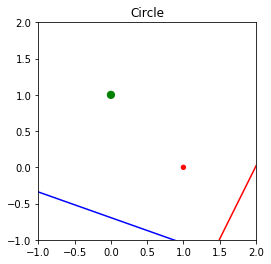

Layer ---------------
[0.945061475049241, -0.47033714123534537] 1.8829221462885175 0 : [0.0, 1.0] 0.0873607874460384
[0.486594082057332, 1.3742590887595927] -0.9544976133906711 1 : [0.0, 1.0] 0.910640869995866
0 activate     [0.945061475049241, -0.47033714123534537] 1.8829221462885175 : [1.0, 0.0] ==> -0.9378606712392765
0 transfer     -0.9378606712392765 ==> 0.28133267950701896
1 activate     [0.486594082057332, 1.3742590887595927] -0.9544976133906711 : [1.0, 0.0] ==> 1.441091695448003
1 transfer     1.441091695448003 ==> 0.8086236498068459
0 activate     [0.945061475049241, -0.47033714123534537] 1.8829221462885175 : [0.0, 1.0] ==> -2.353259287523863
0 transfer     -2.353259287523863 ==> 0.08680705534533507
1 activate     [0.486594082057332, 1.3742590887595927] -0.9544976133906711 : [0.0, 1.0] ==> 2.3287567021502635
1 transfer     2.3287567021502635 ==> 0.9112308187658313
>epoch=88, lrate=0.500, error=1.186


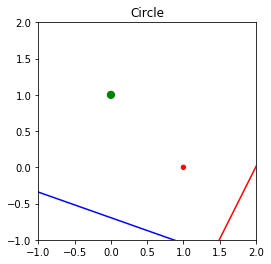

Layer ---------------
[0.945061475049241, -0.4737778079067306] 1.8863628129599028 0 : [0.0, 1.0] 0.08680705534533507
[0.486594082057332, 1.37784932339488] -0.9580878480259585 1 : [0.0, 1.0] 0.9112308187658313
0 activate     [0.945061475049241, -0.4737778079067306] 1.8863628129599028 : [1.0, 0.0] ==> -0.9413013379106618
0 transfer     -0.9413013379106618 ==> 0.28063755335399876
1 activate     [0.486594082057332, 1.37784932339488] -0.9580878480259585 : [1.0, 0.0] ==> 1.4446819300832905
1 transfer     1.4446819300832905 ==> 0.8091786282669317
0 activate     [0.945061475049241, -0.4737778079067306] 1.8863628129599028 : [0.0, 1.0] ==> -2.3601406208666336
0 transfer     -2.3601406208666336 ==> 0.08626310986321023
1 activate     [0.486594082057332, 1.37784932339488] -0.9580878480259585 : [0.0, 1.0] ==> 2.335937171420839
1 transfer     2.335937171420839 ==> 0.9118099287773419
>epoch=89, lrate=0.500, error=1.187


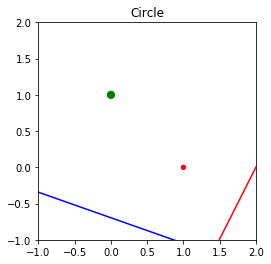

Layer ---------------
[0.945061475049241, -0.47717751408817993] 1.889762519141352 0 : [0.0, 1.0] 0.08626310986321023
[0.486594082057332, 1.38139511908648] -0.9616336437175583 1 : [0.0, 1.0] 0.9118099287773419
0 activate     [0.945061475049241, -0.47717751408817993] 1.889762519141352 : [1.0, 0.0] ==> -0.9447010440921111
0 transfer     -0.9447010440921111 ==> 0.2799517323961091
1 activate     [0.486594082057332, 1.38139511908648] -0.9616336437175583 : [1.0, 0.0] ==> 1.4482277257748903
1 transfer     1.4482277257748903 ==> 0.8097255293977357
0 activate     [0.945061475049241, -0.47717751408817993] 1.889762519141352 : [0.0, 1.0] ==> -2.366940033229532
0 transfer     -2.366940033229532 ==> 0.0857286735567569
1 activate     [0.486594082057332, 1.38139511908648] -0.9616336437175583 : [0.0, 1.0] ==> 2.343028762804038
1 transfer     2.343028762804038 ==> 0.912378519067916
>epoch=90, lrate=0.500, error=1.189


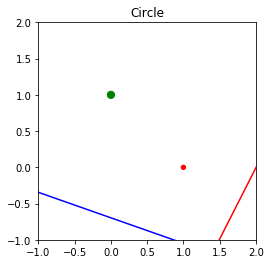

Layer ---------------
[0.945061475049241, -0.48053718943190205] 1.8931221944850742 0 : [0.0, 1.0] 0.0857286735567569
[0.486594082057332, 1.3848975230389327] -0.9651360476700112 1 : [0.0, 1.0] 0.912378519067916
0 activate     [0.945061475049241, -0.48053718943190205] 1.8931221944850742 : [1.0, 0.0] ==> -0.9480607194358333
0 transfer     -0.9480607194358333 ==> 0.27927499414944335
1 activate     [0.486594082057332, 1.3848975230389327] -0.9651360476700112 : [1.0, 0.0] ==> 1.451730129727343
1 transfer     1.451730129727343 ==> 0.8102645598298988
0 activate     [0.945061475049241, -0.48053718943190205] 1.8931221944850742 : [0.0, 1.0] ==> -2.3736593839169764
0 transfer     -2.3736593839169764 ==> 0.08520347969155052
1 activate     [0.486594082057332, 1.3848975230389327] -0.9651360476700112 : [0.0, 1.0] ==> 2.350033570708944
1 transfer     2.350033570708944 ==> 0.9129368959014063
>epoch=91, lrate=0.500, error=1.191


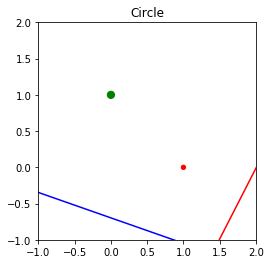

Layer ---------------
[0.945061475049241, -0.4838577329132986] 1.8964427379664708 0 : [0.0, 1.0] 0.08520347969155052
[0.486594082057332, 1.3883575466143974] -0.9685960712454758 1 : [0.0, 1.0] 0.9129368959014063
0 activate     [0.945061475049241, -0.4838577329132986] 1.8964427379664708 : [1.0, 0.0] ==> -0.9513812629172298
0 transfer     -0.9513812629172298 ==> 0.2786071237048307
1 activate     [0.486594082057332, 1.3883575466143974] -0.9685960712454758 : [1.0, 0.0] ==> 1.4551901533028078
1 transfer     1.4551901533028078 ==> 0.8107959187224381
0 activate     [0.945061475049241, -0.4838577329132986] 1.8964427379664708 : [0.0, 1.0] ==> -2.3803004708797695
0 transfer     -2.3803004708797695 ==> 0.08468727172234262
1 activate     [0.486594082057332, 1.3883575466143974] -0.9685960712454758 : [0.0, 1.0] ==> 2.3569536178598733
1 transfer     2.3569536178598733 ==> 0.9134853534100666
>epoch=92, lrate=0.500, error=1.192


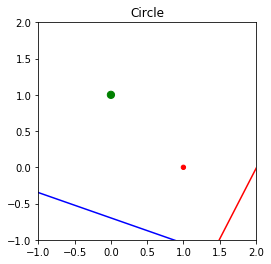

Layer ---------------
[0.945061475049241, -0.4871400141478175] 1.8997250192009898 0 : [0.0, 1.0] 0.08468727172234262
[0.486594082057332, 1.3917761669271806] -0.9720146915582591 1 : [0.0, 1.0] 0.9134853534100666
0 activate     [0.945061475049241, -0.4871400141478175] 1.8997250192009898 : [1.0, 0.0] ==> -0.9546635441517488
0 transfer     -0.9546635441517488 ==> 0.2779479133956888
1 activate     [0.486594082057332, 1.3917761669271806] -0.9720146915582591 : [1.0, 0.0] ==> 1.458608773615591
1 transfer     1.458608773615591 ==> 0.8113197981091791
0 activate     [0.945061475049241, -0.4871400141478175] 1.8997250192009898 : [0.0, 1.0] ==> -2.3868650333488075
0 transfer     -2.3868650333488075 ==> 0.08417980280391688
1 activate     [0.486594082057332, 1.3917761669271806] -0.9720146915582591 : [0.0, 1.0] ==> 2.36379085848544
1 transfer     2.36379085848544 ==> 0.9140241741979978
>epoch=93, lrate=0.500, error=1.194


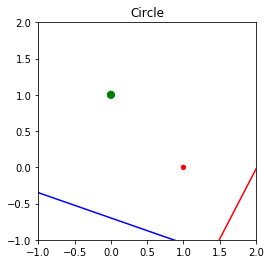

Layer ---------------
[0.945061475049241, -0.4903848746386275] 1.9029698796917998 0 : [0.0, 1.0] 0.08417980280391688
[0.486594082057332, 1.395154328351522] -0.9753928529826004 1 : [0.0, 1.0] 0.9140241741979978
0 activate     [0.945061475049241, -0.4903848746386275] 1.9029698796917998 : [1.0, 0.0] ==> -0.9579084046425588
0 transfer     -0.9579084046425588 ==> 0.27729716248359726
1 activate     [0.486594082057332, 1.395154328351522] -0.9753928529826004 : [1.0, 0.0] ==> 1.4619869350399324
1 transfer     1.4619869350399324 ==> 0.8118363832257054
0 activate     [0.945061475049241, -0.4903848746386275] 1.9029698796917998 : [0.0, 1.0] ==> -2.3933547543304274
0 transfer     -2.3933547543304274 ==> 0.08368083533007595
1 activate     [0.486594082057332, 1.395154328351522] -0.9753928529826004 : [0.0, 1.0] ==> 2.370547181334122
1 transfer     2.370547181334122 ==> 0.9145536299086582
>epoch=94, lrate=0.500, error=1.196


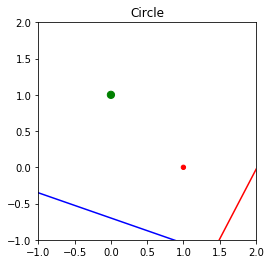

Layer ---------------
[0.945061475049241, -0.4935931289593928] 1.906178134012565 0 : [0.0, 1.0] 0.08368083533007595
[0.486594082057332, 1.3984929439481837] -0.978731468579262 1 : [0.0, 1.0] 0.9145536299086582
0 activate     [0.945061475049241, -0.4935931289593928] 1.906178134012565 : [1.0, 0.0] ==> -0.961116658963324
0 transfer     -0.961116658963324 ==> 0.27665467686048195
1 activate     [0.486594082057332, 1.3984929439481837] -0.978731468579262 : [1.0, 0.0] ==> 1.465325550636594
1 transfer     1.465325550636594 ==> 0.8123458528181028
0 activate     [0.945061475049241, -0.4935931289593928] 1.906178134012565 : [0.0, 1.0] ==> -2.399771262971958
0 transfer     -2.399771262971958 ==> 0.08319014049888118
1 activate     [0.486594082057332, 1.3984929439481837] -0.978731468579262 : [0.0, 1.0] ==> 2.3772244125274455
1 transfer     2.3772244125274455 ==> 0.9150739817589227
>epoch=95, lrate=0.500, error=1.197


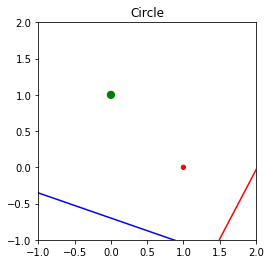

Layer ---------------
[0.945061475049241, -0.4967655658761228] 1.909350570929295 0 : [0.0, 1.0] 0.08319014049888118
[0.486594082057332, 1.4017928968149946] -0.9820314214460728 1 : [0.0, 1.0] 0.9150739817589227
0 activate     [0.945061475049241, -0.4967655658761228] 1.909350570929295 : [1.0, 0.0] ==> -0.9642890958800541
0 transfer     -0.9642890958800541 ==> 0.27602026876638275
1 activate     [0.486594082057332, 1.4017928968149946] -0.9820314214460728 : [1.0, 0.0] ==> 1.4686255035034048
1 transfer     1.4686255035034048 ==> 0.8128483794346895
0 activate     [0.945061475049241, -0.4967655658761228] 1.909350570929295 : [0.0, 1.0] ==> -2.406116136805418
0 transfer     -2.406116136805418 ==> 0.08270749790241025
1 activate     [0.486594082057332, 1.4017928968149946] -0.9820314214460728 : [0.0, 1.0] ==> 2.3838243182610674
1 transfer     2.3838243182610674 ==> 0.9155854810419797
>epoch=96, lrate=0.500, error=1.199


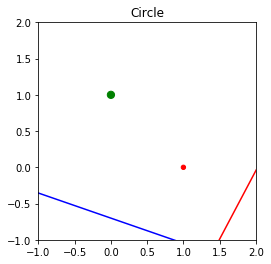

Layer ---------------
[0.945061475049241, -0.4999029494117938] 1.912487954464966 0 : [0.0, 1.0] 0.08270749790241025
[0.486594082057332, 1.4050550413661156] -0.9852935659971938 1 : [0.0, 1.0] 0.9155854810419797
0 activate     [0.945061475049241, -0.4999029494117938] 1.912487954464966 : [1.0, 0.0] ==> -0.967426479415725
0 transfer     -0.967426479415725 ==> 0.27539375652184556
1 activate     [0.486594082057332, 1.4050550413661156] -0.9852935659971938 : [1.0, 0.0] ==> 1.4718876480545258
1 transfer     1.4718876480545258 ==> 0.8133441297018262
0 activate     [0.945061475049241, -0.4999029494117938] 1.912487954464966 : [0.0, 1.0] ==> -2.41239090387676
0 transfer     -2.41239090387676 ==> 0.08223269513942777
1 activate     [0.486594082057332, 1.4050550413661156] -0.9852935659971938 : [0.0, 1.0] ==> 2.3903486073633093
1 transfer     2.3903486073633093 ==> 0.916088369601171
>epoch=97, lrate=0.500, error=1.200


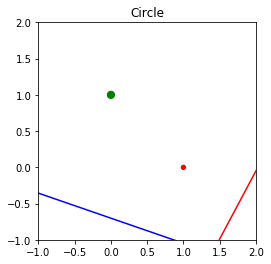

Layer ---------------
[0.945061475049241, -0.5030060198571803] 1.9155910249103525 0 : [0.0, 1.0] 0.08223269513942777
[0.486594082057332, 1.4082802045444567] -0.988518729175535 1 : [0.0, 1.0] 0.916088369601171
0 activate     [0.945061475049241, -0.5030060198571803] 1.9155910249103525 : [1.0, 0.0] ==> -0.9705295498611115
0 transfer     -0.9705295498611115 ==> 0.2747749642740513
1 activate     [0.486594082057332, 1.4082802045444567] -0.988518729175535 : [1.0, 0.0] ==> 1.4751128112328669
1 transfer     1.4751128112328669 ==> 0.8138332645848253
0 activate     [0.945061475049241, -0.5030060198571803] 1.9155910249103525 : [0.0, 1.0] ==> -2.418597044767533
0 transfer     -2.418597044767533 ==> 0.08176552744948282
1 activate     [0.486594082057332, 1.4082802045444567] -0.988518729175535 : [0.0, 1.0] ==> 2.3967989337199915
1 transfer     2.3967989337199915 ==> 0.9165828802767271
>epoch=98, lrate=0.500, error=1.202


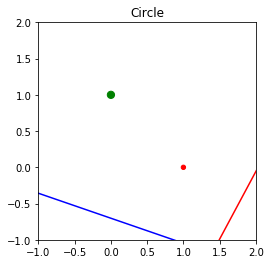

Layer ---------------
[0.945061475049241, -0.5060754947310988] 1.9186604997842711 0 : [0.0, 1.0] 0.08176552744948282
[0.486594082057332, 1.4114691869713591] -0.9917077116024373 1 : [0.0, 1.0] 0.9165828802767271
0 activate     [0.945061475049241, -0.5060754947310988] 1.9186604997842711 : [1.0, 0.0] ==> -0.9735990247350301
0 transfer     -0.9735990247350301 ==> 0.2741637217558536
1 activate     [0.486594082057332, 1.4114691869713591] -0.9917077116024373 : [1.0, 0.0] ==> 1.4783017936597693
1 transfer     1.4783017936597693 ==> 0.8143159396349017
0 activate     [0.945061475049241, -0.5060754947310988] 1.9186604997842711 : [0.0, 1.0] ==> -2.4247359945153697
0 transfer     -2.4247359945153697 ==> 0.0813057973670573
1 activate     [0.486594082057332, 1.4114691869713591] -0.9917077116024373 : [0.0, 1.0] ==> 2.4031768985737965
1 transfer     2.4031768985737965 ==> 0.9170692373271935
>epoch=99, lrate=0.500, error=1.203


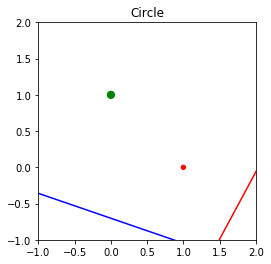

Layer ---------------
[0.945061475049241, -0.5091120696930479] 1.9216970747462203 0 : [0.0, 1.0] 0.0813057973670573
[0.486594082057332, 1.4146227640373632] -0.9948612886684415 1 : [0.0, 1.0] 0.9170692373271935
0 activate     [0.945061475049241, -0.5091120696930479] 1.9216970747462203 : [1.0, 0.0] ==> -0.9766355996969793
0 transfer     -0.9766355996969793 ==> 0.2735598640569537
1 activate     [0.486594082057332, 1.4146227640373632] -0.9948612886684415 : [1.0, 0.0] ==> 1.4814553707257736
1 transfer     1.4814553707257736 ==> 0.8147923052230396
0 activate     [0.945061475049241, -0.5091120696930479] 1.9216970747462203 : [0.0, 1.0] ==> -2.430809144439268
0 transfer     -2.430809144439268 ==> 0.08085331439448842
1 activate     [0.486594082057332, 1.4146227640373632] -0.9948612886684415 : [0.0, 1.0] ==> 2.4094840527058046
1 transfer     2.4094840527058046 ==> 0.9175476568272141
>epoch=99, lrate=0.500, error=1.205
test
0 activate     [0.945061475049241, 0.2541036809640428] 1.1584813240891294 

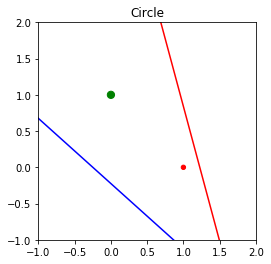

Layer ---------------
[0.945061475049241, -0.5091120696930479] 1.9216970747462203 0 : [0.0, 1.0] 0.08085331439448842
[0.486594082057332, 1.4146227640373632] -0.9948612886684415 1 : [0.0, 1.0] 0.9175476568272141
------------------------
min error: 0.9239549786775365
accuracy: 0.5


In [33]:
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]

T = [[2.7810836,2.550537003,0],
    [1.93756466,7.108563011,1] 
    ]
seed(1974)

n_inputs = len(T[0]) - 1
network = SSNN_network()
# CASE 1:  network.init(n_inputs, [],['S','S'],[0,1])
network.init(n_inputs, [],[('L',0),('L',1)])
#network = set_network_1(network)
#network.print_network_param()
opt_nw = network.train_network( T, .5, 100,10)
